In [131]:
import pandas as pd


# Load the data
voting_df = pd.read_csv('data/voting-by-county.csv')

# Filter for the year 2020
voting_df = voting_df.query('year == 2020')

# Filter for the two main parties
voting_df = voting_df[voting_df['party'].isin(['DEMOCRAT', 'REPUBLICAN'])]

# Create the new column
voting_df['percent_votes'] = voting_df['candidatevotes'] / voting_df['totalvotes']

# Drop unnecessary columns
voting_df = voting_df.drop(columns=['candidatevotes', 'totalvotes', 'office', 'candidate', 'version', 'mode', 'state', 'state_po', 'year', 'county_name'])

# Group by county_fips and party, and aggregate percent_votes
voting_df = voting_df.groupby(['county_fips', 'party']).agg({'percent_votes': 'mean'}).reset_index()

# Pivot the DataFrame
pivot_df = voting_df.pivot(index='county_fips', columns='party', values='percent_votes')

# Rename the columns
pivot_df = pivot_df.rename(columns={'DEMOCRAT': 'percent_democrat', 'REPUBLICAN': 'percent_republican'})

# Reset the index to make county_fips a column again
pivot_df = pivot_df.reset_index()

# Convert county_fips to integer and rename to FIPS
pivot_df['county_fips'] = pivot_df['county_fips'].astype(int)
pivot_df = pivot_df.rename(columns={'county_fips': 'FIPS'})

# Display the first 10 rows to verify
voting_df = pivot_df[['FIPS', 'percent_democrat', 'percent_republican']]

# voting_df.head(10)

In [132]:
vaccine_df = pd.read_csv('data/CDC_covid_data.csv')

vaccine_df = vaccine_df[['FIPS', 'Administered_Dose1_Recip_18PlusPop_Pct']]

vaccine_df = vaccine_df.dropna()


# Sort vaccine_df based on FIPS
vaccine_df = vaccine_df[vaccine_df['FIPS'].apply(lambda x: str(x).isdigit())]
vaccine_df['FIPS'] = vaccine_df['FIPS'].astype(int)
#vaccine_df = vaccine_df.sort_values(by='FIPS')

# vaccine_df.head(10)

/var/folders/30/tv8y9sjj267fr2h48qhlgsh00000gn/T/ipykernel_12894/1588999368.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  vaccine_df = pd.read_csv('data/CDC_covid_data.csv')


In [133]:
# literacy dataset

''' 
data from : https://nces.ed.gov/surveys/piaac/skillsmap/
'''

literacy_df = pd.read_csv('data/literacy_rates.csv')
literacy_df = literacy_df[literacy_df['grpName'] == 'all']
literacy_df = literacy_df[['FIPS_code', 'Lit_A']]
literacy_df = literacy_df.rename(columns={'FIPS_code': 'FIPS', 'Lit_A': 'avg_literacy_score'})


In [134]:
# life expectancy dataset

''' 
Downloaded from : https://ghdx.healthdata.org/record/ihme-data/united-states-life-expectancy-by-county-race-ethnicity-2000-2019
Based on this paper: https://www.sciencedirect.com/science/article/pii/S0140673622008765?via%3Dihub#cesec90 
'''

# read in 
life_expectancy_df = pd.read_csv('data/life_expectancy_2019_both.csv')

# all races
life_expectancy_df = life_expectancy_df[life_expectancy_df['race_id'] == 1]

# slim down 
life_expectancy_df = life_expectancy_df[['fips', 'val']]

# fips int conversion 
life_expectancy_df = life_expectancy_df.dropna(subset=['fips', 'val'])
life_expectancy_df = life_expectancy_df[pd.to_numeric(life_expectancy_df['fips'], errors='coerce').notnull()]
life_expectancy_df['fips'] = life_expectancy_df['fips'].astype(int)

# rename columns
life_expectancy_df = life_expectancy_df.rename(columns={'fips': 'FIPS', 'val': 'life_expectancy'})

# In case of multiple FIPS present, pick the one with the higher life_expectancy
life_expectancy_df = life_expectancy_df.loc[life_expectancy_df.groupby('FIPS')['life_expectancy'].idxmax()]

# Display the resulting DataFrame
# life_expectancy_df['life_expectancy'].value_counts()

In [135]:
# national census dataset 

'''
downloaded from: https://www.census.gov/data/tables/time-series/demo/popest/2020s-counties-detail.html
'''

census_df = pd.read_csv('data/census_data.csv', encoding='latin1')

# get fips
census_df['COUNTY'] = census_df['COUNTY'].astype(str).str.zfill(3)
census_df['FIPS'] = (census_df['STATE'].astype(str) + census_df['COUNTY'].astype(str)).astype(int)

# Filter to keep only rows where AGEGRP is 0
census_df = census_df[census_df['AGEGRP'] == 0]
census_df = census_df[census_df['YEAR'] == 5]

# Drop columns
census_df = census_df.drop(columns=['AGEGRP', 'SUMLEV', 'STATE', 'COUNTY', 'CTYNAME', 'STNAME', 'YEAR'])

# Identify columns to be divided by TOT_POP
columns_to_divide = census_df.columns.difference(['TOT_POP', 'FIPS'])

# Divide each of these columns by TOT_POP to get the proportion
census_df[columns_to_divide] = census_df[columns_to_divide].div(census_df['TOT_POP'], axis=0)

census_df = census_df.rename(columns={'TOT_MALE': 'PROP_MALE', 'TOT_FEMALE': 'PROP_FEMALE'})

# just a few demographics are kept
census_df = census_df[['FIPS', 'PROP_MALE', 'PROP_FEMALE', 'TOT_POP']]

# display
print(census_df.shape)
# census_df.head()


(3144, 4)


In [136]:
# PLACES county level dataset 

places_raw_df = pd.read_csv('data/PLACES_county_data.csv')

places_raw_df['Measure'].unique()

array(['Arthritis among adults aged >=18 years',
       'Mammography use among women aged 50-74 years',
       'Obesity among adults aged >=18 years',
       'All teeth lost among adults aged >=65 years',
       'Depression among adults aged >=18 years',
       'Stroke among adults aged >=18 years',
       'Diagnosed diabetes among adults aged >=18 years',
       'Coronary heart disease among adults aged >=18 years',
       'Any disability among adults aged >=18 years',
       'Mobility disability among adults aged >=18 years',
       'Vision disability among adults aged >=18 years',
       'Current asthma among adults aged >=18 years',
       'Hearing disability among adults aged >=18 years',
       'High blood pressure among adults aged >=18 years',
       'Binge drinking among adults aged >=18 years',
       'Cognitive disability among adults ages >=18 years',
       'Current smoking among adults aged >=18 years',
       'Physical health not good for >=14 days among adults aged >=18

In [137]:

# obesity subset
obesity_df = places_raw_df[places_raw_df['Measure'] == 'Obesity among adults aged >=18 years']
obesity_df = obesity_df[obesity_df['DataValueTypeID']!= 'AgeAdjPrv']

obesity_df = obesity_df.rename(columns={'Data_Value': 'obesity_rate', 'LocationID': 'FIPS'})
obesity_df = obesity_df[['FIPS', 'obesity_rate']]

# insurance subset 
insurance_df = places_raw_df[places_raw_df['Measure'] == 'Current lack of health insurance among adults aged 18-64 years']
insurance_df = insurance_df[insurance_df['DataValueTypeID'] == 'CrdPrv']
insurance_df = insurance_df.rename(columns={'Data_Value': 'lack_health_insurance', 'LocationID': 'FIPS'})
insurance_df = insurance_df[['FIPS', 'lack_health_insurance']]

# doctor visits subset
doctor_visits_df = places_raw_df[places_raw_df['Measure'] == 'Visits to doctor for routine checkup within the past year among adults aged >=18 years']
doctor_visits_df = doctor_visits_df[doctor_visits_df['DataValueTypeID'] == 'CrdPrv']
doctor_visits_df = doctor_visits_df.rename(columns={'Data_Value': 'routine_checkup', 'LocationID': 'FIPS'})
doctor_visits_df = doctor_visits_df[['FIPS', 'routine_checkup']]

In [138]:
# places sdoh dataset
places_sd_df = pd.read_csv('data/PLACES_SDOH_data.csv')
places_sd_df['Measure'].unique()

# high school subset
high_school_df = places_sd_df[places_sd_df['Measure'] == 'No high school diploma among adults aged 25 years or older']
high_school_df = high_school_df.rename(columns={'Data_Value': 'no_high_school', 'LocationID': 'FIPS'})
high_school_df = high_school_df[['FIPS', 'no_high_school']]

# internet subset
internet_df = places_sd_df[places_sd_df['Measure'] == 'No broadband internet subscription among households']
internet_df = internet_df.rename(columns={'Data_Value': 'no_internet', 'LocationID': 'FIPS'})
internet_df = internet_df[['FIPS', 'no_internet']]

# minority subset
minority_df = places_sd_df[places_sd_df['Measure'] == 'Persons of racial or ethnic minority status']
minority_df = minority_df.rename(columns={'Data_Value': 'minority_count', 'LocationID': 'FIPS'})
minority_df = minority_df[['FIPS', 'minority_count']]

In [139]:
# SAIPE povery dataset 
poverty_df = pd.read_csv('data/poverty_SAIPE_data.csv')
poverty_df.head()

# get fips
poverty_df['County FIPS Code'] = poverty_df['County FIPS Code'].astype(str).str.zfill(3)
poverty_df['FIPS'] = (poverty_df['State FIPS Code'].astype(str) + poverty_df['County FIPS Code'].astype(str)).astype(int)
poverty_df = poverty_df.rename(columns={'Poverty Percent, All Ages': 'poverty_percent'})
poverty_df = poverty_df[['FIPS', 'poverty_percent']]
poverty_df.head()

FIPS poverty_percent
0     0            12.6
1  1000            16.2
2  1001            11.8
3  1003            12.4
4  1005            26.7

In [140]:
# NIH Air Pollution dataset
air_pollution_df = pd.read_csv('data/NIH_Air_Pollution.csv')
air_pollution_df = air_pollution_df.rename(columns={'Micrograms per cubic meter (PM2.5)(2)': 'air_pollution', 'FIPS': 'FIPS'})
air_pollution_df.columns = air_pollution_df.columns.str.strip()
air_pollution_df = air_pollution_df[air_pollution_df['air_pollution'] != 'data not available']

In [141]:
# CountyHealthRankings dataset from : https://www.countyhealthrankings.org/health-data/methodology-and-sources/data-documentation
# click on 2024 County Health Release National Data

county_health_df = pd.read_csv('data/CountyHealthRankings.csv')
# Process 'Primary Care Physicians Ratio' column
def process_ratio(value):
    if pd.isna(value):
        return value
    parts = str(value).split(':')
    if len(parts) > 1 and parts[1] == '0':
        return 0
    return int(parts[0])

# higher is bad, it means more patients per physician
county_health_df['Primary Care Physicians Ratio'] = county_health_df['Primary Care Physicians Ratio'].apply(process_ratio)

county_health_df['Presence of Water Violation'] = county_health_df['Presence of Water Violation'].replace({'No': 0, 'Yes': 1})

county_health_df = county_health_df.drop(columns = ['Child Mortality Rate', 'HIV Prevalence Rate', 'Drug Overdose Mortality Rate', 'Crude Suicide Rate', 'Firearm Fatalities Rate'])

print(county_health_df.shape)
county_health_df.head(10)

(3201, 18)


/var/folders/30/tv8y9sjj267fr2h48qhlgsh00000gn/T/ipykernel_12894/677463747.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  county_health_df['Presence of Water Violation'] = county_health_df['Presence of Water Violation'].replace({'No': 0, 'Yes': 1})


FIPS  Primary Care Physicians Ratio  Teen Birth Rate  \
0  1000                         1571.0             25.0   
1  1001                         2273.0             21.0   
2  1003                         1595.0             20.0   
3  1005                         2496.0             37.0   
4  1007                         1498.0             32.0   
5  1009                         4920.0             25.0   
6  1011                         5160.0             37.0   
7  1013                         3777.0             35.0   
8  1015                         1705.0             26.0   
9  1017                         2467.0             30.0   

   Food Environment Index  % Unemployed  Income Ratio  \
0                     5.4           2.6           5.2   
1                     6.7           2.3           4.6   
2                     7.5           2.4           4.5   
3                     6.0           4.1           5.6   
4                     7.6           2.5           5.7   
5                     7.7           2.2           4.6   
6                     4.2           2.8           7.1   
7                     7.2           3.4           4.9   
8                     5.9           3.0           4.9   
9                     7.2           2.6           4.7   

   Presence of Water Violation  % Adults with Diabetes  % Food Insecure  \
0                          NaN                    13.0             15.0   
1                          0.0                    11.0             13.0   
2                          1.0                    10.0             12.0   
3                          0.0                    16.0             18.0   
4                          0.0                    12.0             15.0   
5                          0.0                    11.0             14.0   
6                          0.0                    19.0             16.0   
7                          1.0                    14.0             14.0   
8                          0.0                    12.0             16.0   
9                          0.0                    13.0             13.0   

   % Limited Access to Healthy Foods  Segregation Index  Gender Pay Gap  \
0                                9.0               0.27            0.74   
1                               13.0               0.05            0.75   
2                                8.0               0.09            0.72   
3                               10.0               0.04            0.78   
4                                0.0               0.09            0.81   
5                                3.0               0.10            0.88   
6                               32.0               0.01            0.67   
7                                7.0               0.12            0.78   
8                               15.0               0.19            0.76   
9                                8.0               0.13            0.77   

   School Funding Adequacy  Median Household Income  \
0                  -7912.0                  59703.0   
1                  -3607.0                  70148.0   
2                   -537.0                  71704.0   
3                 -23627.0                  41151.0   
4                  -6971.0                  54309.0   
5                  -2789.0                  60553.0   
6                 -38453.0                  35798.0   
7                 -15081.0                  41852.0   
8                 -10277.0                  52772.0   
9                 -26351.0                  45563.0   

   % Household Income Required for Child Care Expenses  % Voter Turnout  \
0                                               27.0               62.6   
1                                               20.0               66.2   
2                                               20.0               65.3   
3                                               25.0               54.0   
4                                               24.0               54.6   
5                

In [142]:
# Count the number of NaN, null, or empty entries for each column
na_counts = county_health_df.isna().sum()
empty_counts = (county_health_df == '').sum()

# Combine the counts into a DataFrame for better readability
na_summary = pd.DataFrame({
    'Column': county_health_df.columns,
    'NaN Count': na_counts,
    'Empty Count': empty_counts
})

print(na_summary)

                                                                                               Column  \
FIPS                                                                                             FIPS   
Primary Care Physicians Ratio                                           Primary Care Physicians Ratio   
Teen Birth Rate                                                                       Teen Birth Rate   
Food Environment Index                                                         Food Environment Index   
% Unemployed                                                                             % Unemployed   
Income Ratio                                                                             Income Ratio   
Presence of Water Violation                                               Presence of Water Violation   
% Adults with Diabetes                                                         % Adults with Diabetes   
% Food Insecure                                        

In [143]:
merged_df = pd.merge(voting_df, vaccine_df, on='FIPS', how='left')
merged_df = pd.merge(merged_df, literacy_df, on='FIPS', how='left')
merged_df = pd.merge(merged_df, life_expectancy_df, on='FIPS', how='left')
merged_df = pd.merge(merged_df, census_df, on='FIPS', how='left')
merged_df = pd.merge(merged_df, obesity_df, on='FIPS', how='left')
merged_df = pd.merge(merged_df, insurance_df, on='FIPS', how='left')
merged_df = pd.merge(merged_df, doctor_visits_df, on='FIPS', how='left')
merged_df = pd.merge(merged_df, poverty_df, on='FIPS', how='left')
merged_df = pd.merge(merged_df, air_pollution_df, on='FIPS', how='left')
merged_df = pd.merge(merged_df, high_school_df, on='FIPS', how='left')
merged_df = pd.merge(merged_df, internet_df, on='FIPS', how='left')
merged_df = pd.merge(merged_df, minority_df, on='FIPS', how='left')
merged_df = pd.merge(merged_df, county_health_df, on='FIPS', how='left')

# Drop rows where Administered_Dose1_Recip_18PlusPop_Pct is 0
merged_df = merged_df[merged_df['Administered_Dose1_Recip_18PlusPop_Pct'] != 0]

# Drop rows with any NaN values
merged_df = merged_df.dropna()

# Sort the filtered DataFrame by Administered_Dose1_Recip_18PlusPop_Pct in descending order
merged_df = merged_df.sort_values(by='Administered_Dose1_Recip_18PlusPop_Pct', ascending=False)

# Drop duplicate rows based on FIPS, keeping the first occurrence
merged_df = merged_df.drop_duplicates(subset='FIPS', keep='first')

merged_df['political_affiliation'] = merged_df.apply(
    lambda row: 0 if row['percent_democrat'] > row['percent_republican'] else 1, axis=1
)

# Display the first 10 rows to verify
print(merged_df.shape)
merged_df.head(10)

(2530, 35)


FIPS  percent_democrat  percent_republican  \
116812    6073          0.602100            0.374557   
956860   30087          0.317784            0.658892   
158104    8097          0.751777            0.232500   
1314143  42029          0.579875            0.408789   
682436   22125          0.366624            0.616305   
1332628  42091          0.626299            0.363535   
1840182  56039          0.665990            0.293569   
941644   30035          0.642692            0.335410   
1328383  42077          0.532112            0.456162   
931949   30003          0.520694            0.461329   

         Administered_Dose1_Recip_18PlusPop_Pct  avg_literacy_score  \
116812                                    100.0               267.3   
956860                                    100.0               260.7   
158104                                    100.0               283.2   
1314143                                   100.0               283.0   
682436                                    100.0               244.3   
1332628                                   100.0               285.1   
1840182                                   100.0               282.2   
941644                                    100.0               250.2   
1328383                                   100.0               262.9   
931949                                    100.0               254.8   

         life_expectancy  PROP_MALE  PROP_FEMALE    TOT_POP  obesity_rate  \
116812         82.150820   0.505251     0.494749  3269973.0          23.7   
956860         74.473644   0.498897     0.501103     8160.0          36.2   
158104         91.342130   0.520252     0.479748    16640.0          20.1   
1314143        81.528558   0.496098     0.503902   549784.0          31.8   
682436         77.259754   0.659163     0.340837    15371.0          41.4   
1332628        80.957606   0.490181     0.509819   868742.0          30.6   
1840182        85.905597   0.524492     0.475508    23232.0          22.2   
941644         72.113473   0.487104     0.512896    13609.0          44.9   
1328383        79.665674   0.492942     0.507058   377754.0          33.7   
931949         71.703016   0.494314     0.505686    12751.0          39.3   

         ...  % Limited Access to Healthy Foods  Segregation Index  \
116812   ...                                3.0               0.19   
956860   ...                               11.0               0.38   
158104   ...                                2.0               0.18   
1314143  ...                                6.0               0.13   
682436   ...                               15.0               0.00   
1332628  ...                                4.0               0.13   
1840182  ...                                4.0               0.08   
941644   ...                               15.0               0.42   
1328383  ...                                4.0               0.22   
931949   ...                               24.0               0.12   

        Gender Pay Gap School Funding Adequacy  Median Household Income  \
116812            0.86                 -2871.0                  98365.0   
956860            0.69                 -2455.0                  64003.0   
158104            0.87                 11000.0                 111291.0   
1314143           0.75                  6548.0                 117326.0   
682436            0.76                  2622.0                  68266.0   
1332628           0.81                  8682.0                 106743.0   
1840182           0.83                 12416.0                 127677.0   
941644            0.93                 -7084.0                  46270.0   
1328383           0.79                  5089.0                  72590.0   
931949            0.88                -23733.0                  49113.0   

         % Household Income Required for Child Care Expenses  % Voter Turnout  \
116812                                                30.0               69.8   
9568

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming merged_df is already created and contains the necessary columns

# Prepare the data
X = merged_df.drop(columns=['political_affiliation', 'percent_democrat', 'percent_republican', 'FIPS'])
y = merged_df['political_affiliation']

# Split the data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

# Predict the political affiliation on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# Extract the coefficients and pair them with their corresponding feature names
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
})

# Display the feature importances
# negative means more likely to be democrat! 
pd.set_option('display.max_rows', None)
print(feature_importance.sort_values(by='Importance', ascending=False))

Model Accuracy: 0.91
                                              Feature    Importance
11                                     no_high_school  3.125235e-01
21                                    % Food Insecure  1.286651e-01
29                                       % Homeowners  1.234389e-01
10                                      air_pollution  1.161624e-01
15                                    Teen Birth Rate  9.439110e-02
1                                  avg_literacy_score  8.692332e-02
17                                       % Unemployed  5.947823e-02
6                                        obesity_rate  4.288050e-02
7                               lack_health_insurance  2.596993e-02
12                                        no_internet  2.531763e-02
22                  % Limited Access to Healthy Foods  2.174224e-02
30                                            % Rural  9.977744e-03
4                                         PROP_FEMALE  1.525371e-03
19                        P

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming merged_df is already created and contains the necessary columns

# Prepare the data
X = merged_df.drop(columns=['political_affiliation', 'percent_democrat', 'percent_republican', 'FIPS'])
y = merged_df['political_affiliation']

# Split the data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the political affiliation on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# Extract the feature importances and pair them with their corresponding feature names
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

# Display the feature importances
pd.set_option('display.max_rows', None)
print(feature_importance.sort_values(by='Importance', ascending=False))

Model Accuracy: 0.93
                                              Feature  Importance
0              Administered_Dose1_Recip_18PlusPop_Pct    0.114126
30                                            % Rural    0.091349
13                                     minority_count    0.086550
5                                             TOT_POP    0.069676
29                                       % Homeowners    0.054174
6                                        obesity_rate    0.051107
25                            School Funding Adequacy    0.038184
27  % Household Income Required for Child Care Exp...    0.037533
8                                     routine_checkup    0.030693
20                             % Adults with Diabetes    0.029955
12                                        no_internet    0.028230
14                      Primary Care Physicians Ratio    0.027900
1                                  avg_literacy_score    0.027428
4                                         PROP_FEMALE  

In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming merged_df is already created and contains the necessary columns

# Prepare the data
X = merged_df.drop(columns=['political_affiliation', 'percent_democrat', 'percent_republican', 'FIPS'])
y = merged_df['political_affiliation']

# Split the data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Model Accuracy: {accuracy:.2f}')
    
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        })
        print(f'{model_name} Feature Importances:')
        print(feature_importance.sort_values(by='Importance', ascending=False))
    print('\n')

# RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(rf_model, 'RandomForest')

# DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
train_and_evaluate(dt_model, 'DecisionTree')

# GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
train_and_evaluate(gb_model, 'GradientBoosting')

# KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn_model, 'KNeighbors')

RandomForest Model Accuracy: 0.93
RandomForest Feature Importances:
                                              Feature  Importance
0              Administered_Dose1_Recip_18PlusPop_Pct    0.114126
30                                            % Rural    0.091349
13                                     minority_count    0.086550
5                                             TOT_POP    0.069676
29                                       % Homeowners    0.054174
6                                        obesity_rate    0.051107
25                            School Funding Adequacy    0.038184
27  % Household Income Required for Child Care Exp...    0.037533
8                                     routine_checkup    0.030693
20                             % Adults with Diabetes    0.029955
12                                        no_internet    0.028230
14                      Primary Care Physicians Ratio    0.027900
1                                  avg_literacy_score    0.027428
4       

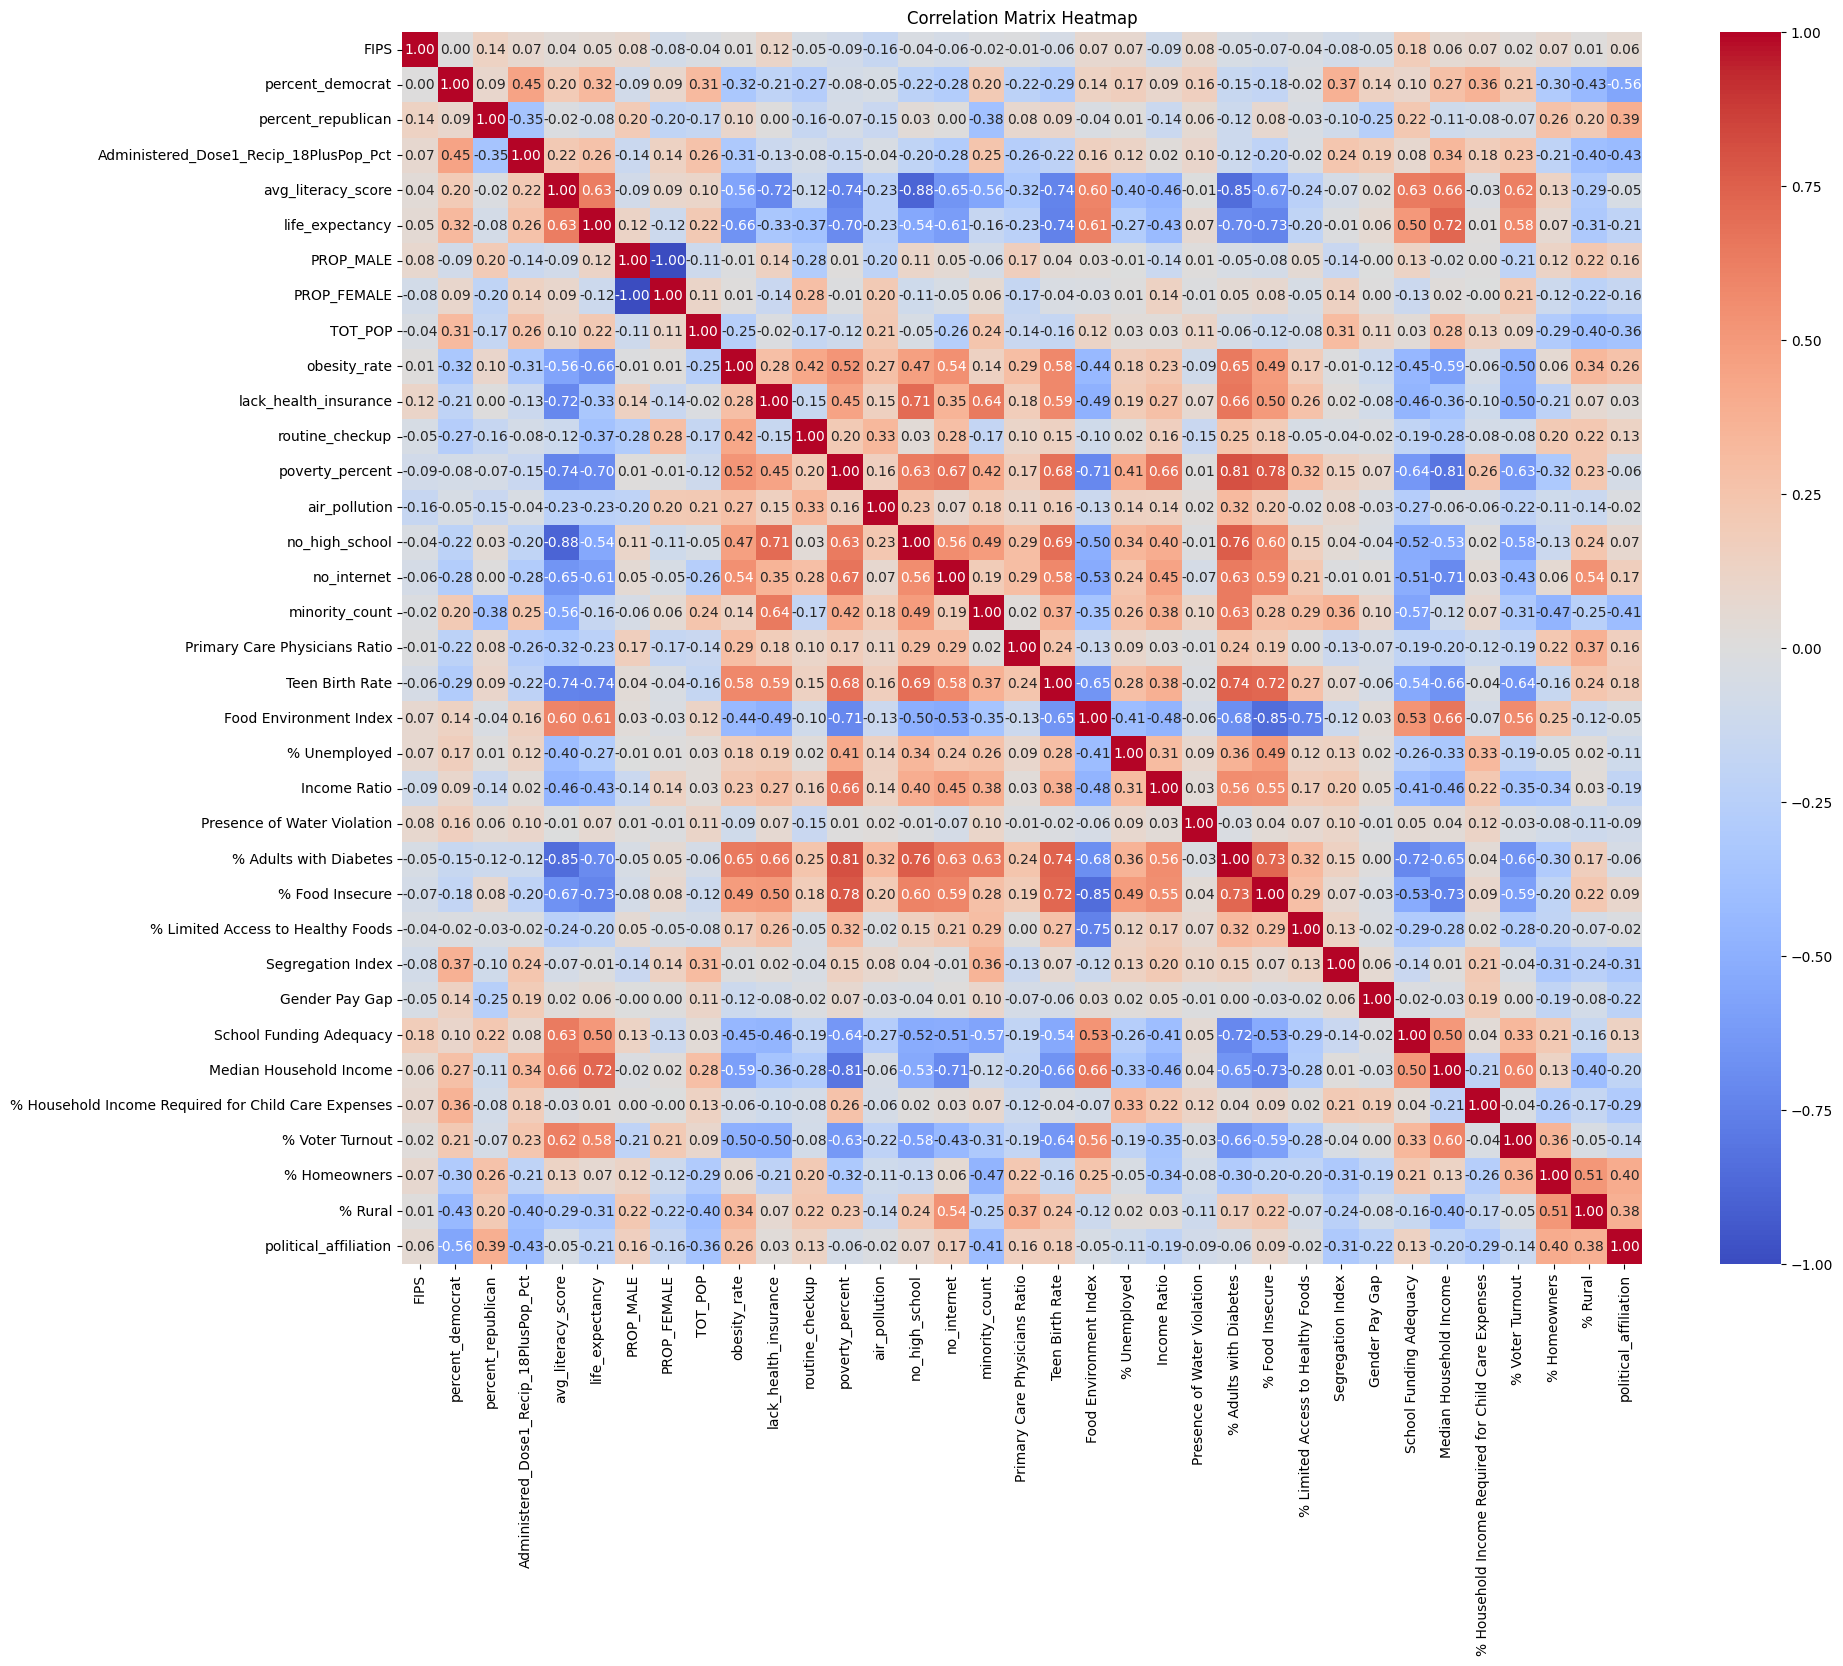

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is already created and contains the necessary columns

# Compute the correlation matrix
correlation_matrix = merged_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

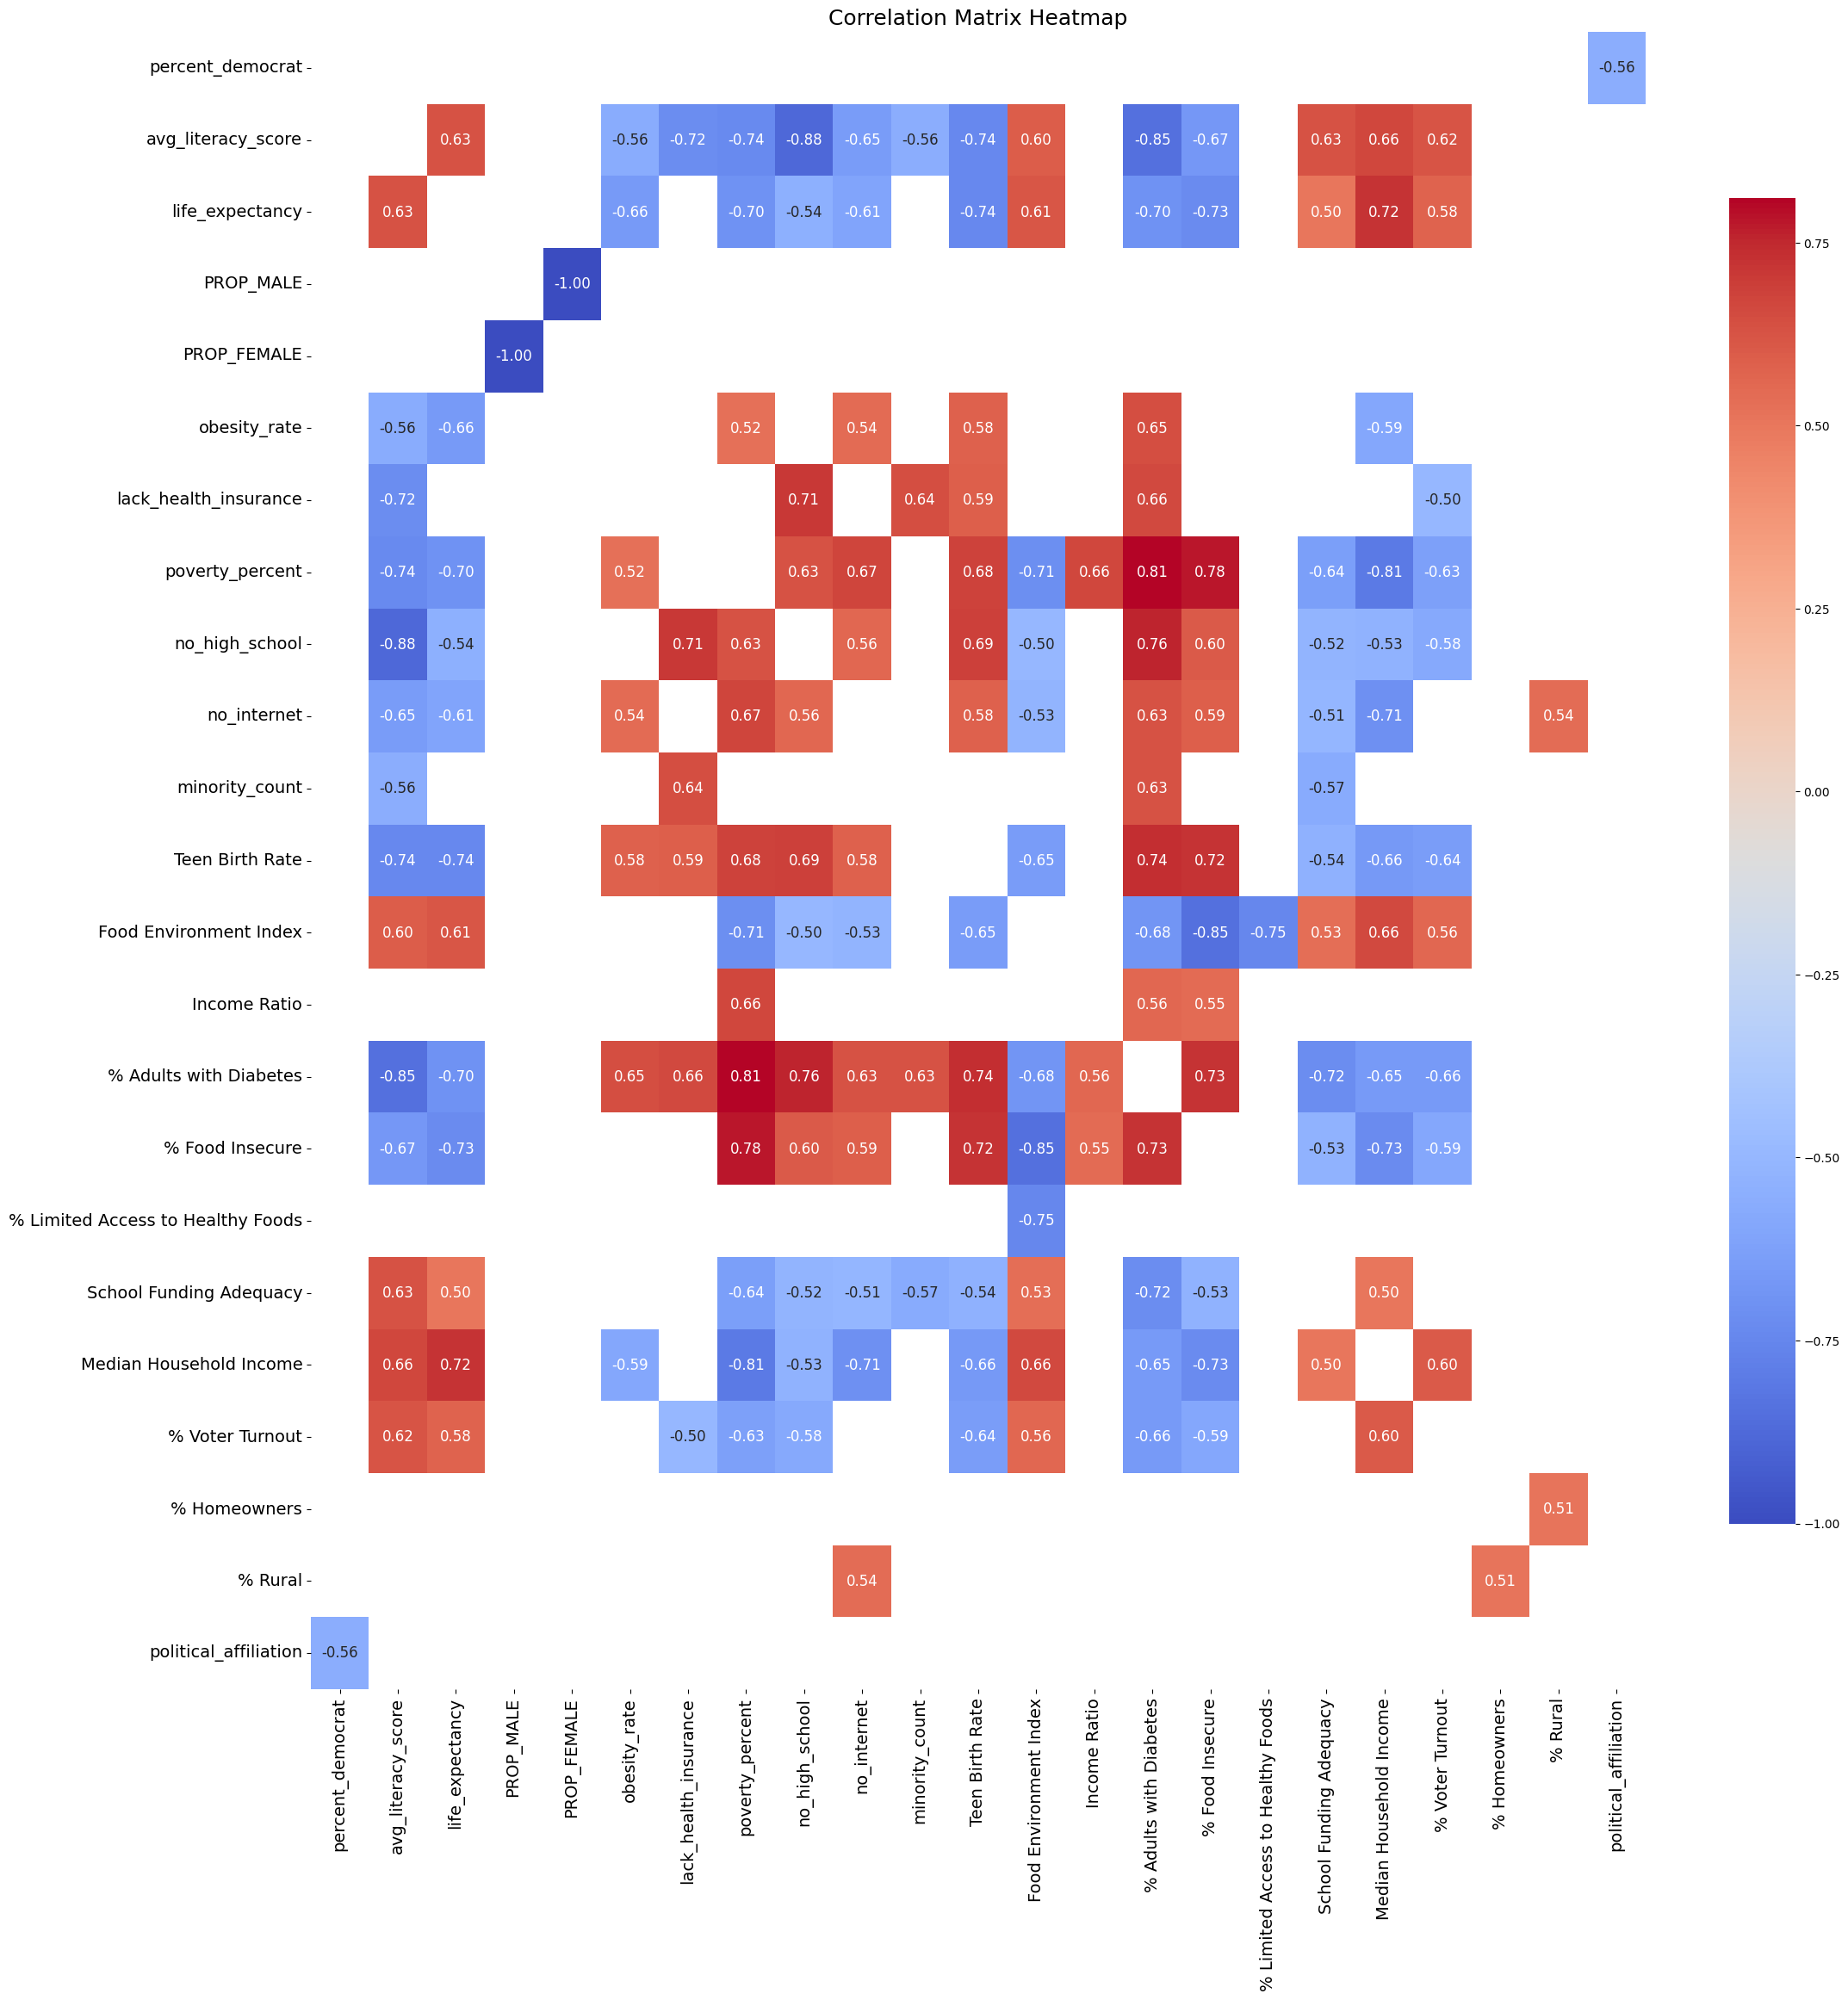

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming merged_df is already created and contains the necessary columns

# Compute the correlation matrix
correlation_matrix = merged_df.corr()

# Create a mask to emphasize cells with correlation above 0.5 or below -0.5, ignoring the diagonal
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.abs(correlation_matrix) < 0.5] = True
np.fill_diagonal(mask, True)  # White out the diagonal

# Convert the mask to a DataFrame
mask = pd.DataFrame(mask, index=correlation_matrix.index, columns=correlation_matrix.columns)

# Drop labels that don't have a single significant cell in their column/row
significant_labels = correlation_matrix.columns[(~mask).any(axis=0) | (~mask).any(axis=1)]
correlation_matrix = correlation_matrix.loc[significant_labels, significant_labels]
mask = mask.loc[significant_labels, significant_labels]

# Plot the heatmap with a larger figure size and increased font size for labels
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, cbar_kws={"shrink": .8}, annot_kws={"size": 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.show()

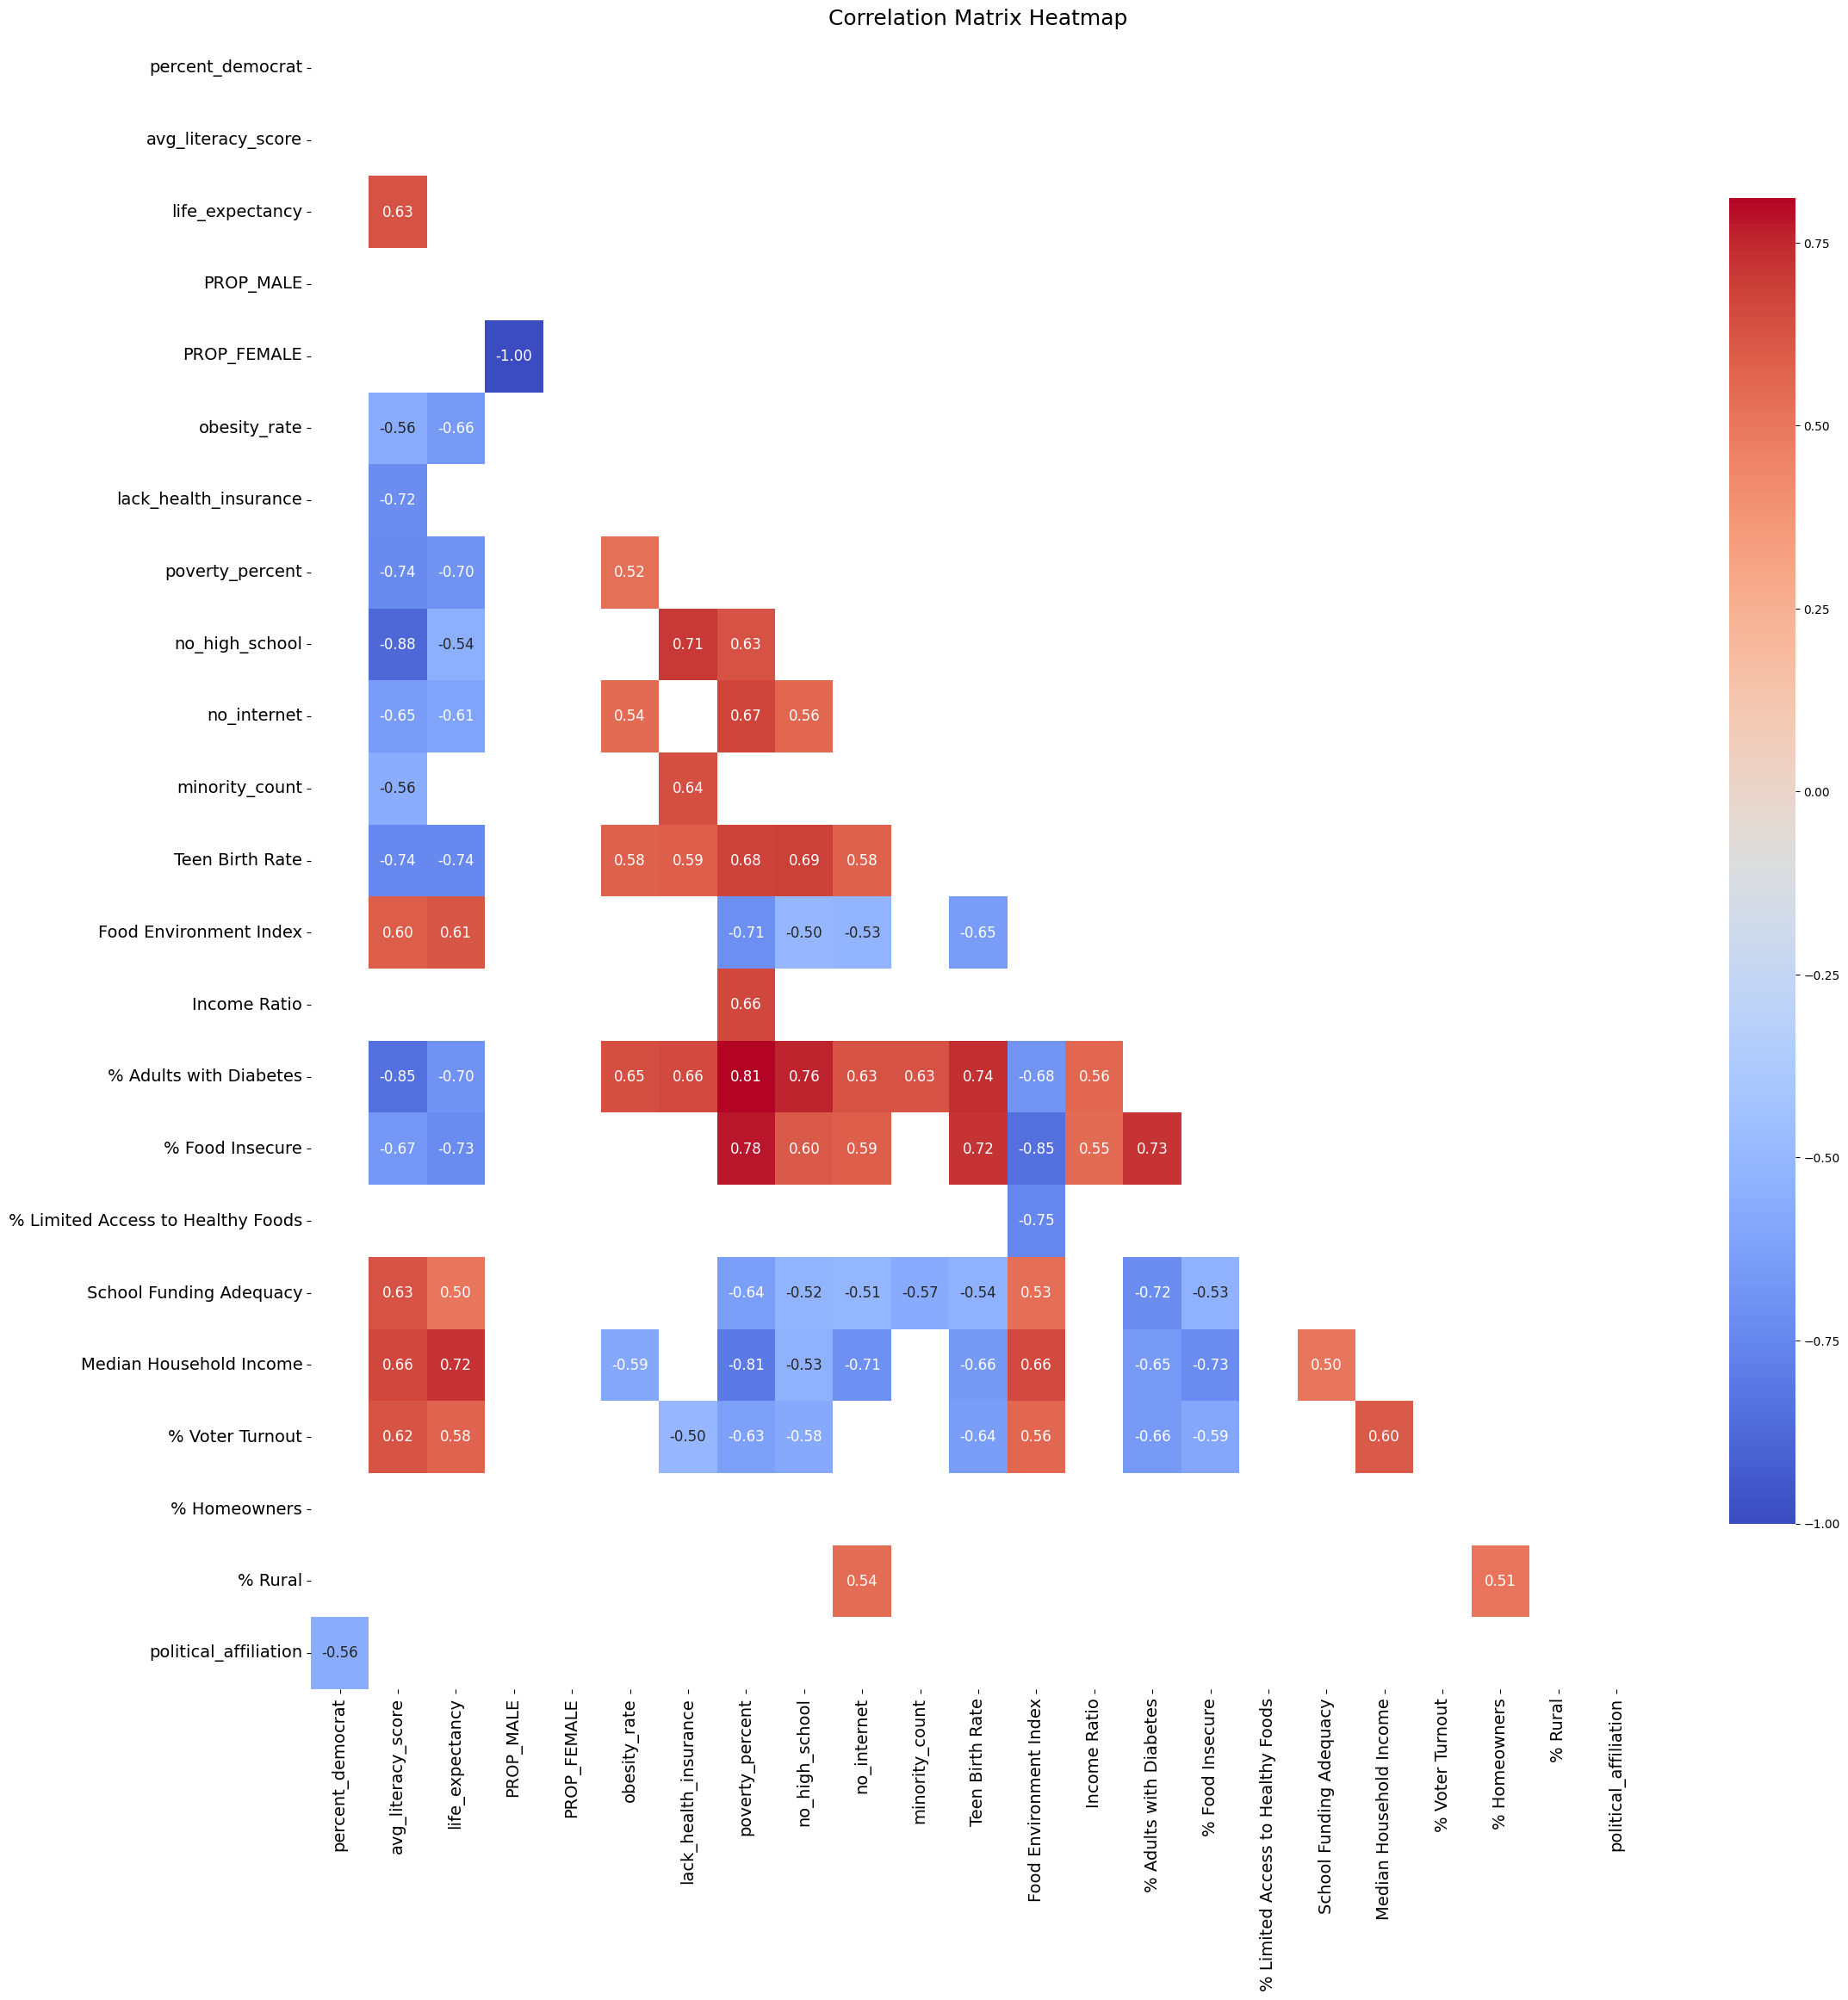

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming merged_df is already created and contains the necessary columns

# Compute the correlation matrix
correlation_matrix = merged_df.corr()

# Create a mask to emphasize cells with correlation above 0.5 or below -0.5, ignoring the diagonal
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.abs(correlation_matrix) < 0.5] = True
np.fill_diagonal(mask, True)  # White out the diagonal

# Convert the mask to a DataFrame
mask = pd.DataFrame(mask, index=correlation_matrix.index, columns=correlation_matrix.columns)

# Drop labels that don't have a single significant cell in their column/row
significant_labels = correlation_matrix.columns[(~mask).any(axis=0) | (~mask).any(axis=1)]
correlation_matrix = correlation_matrix.loc[significant_labels, significant_labels]
mask = mask.loc[significant_labels, significant_labels]

# Create a mask to display only the bottom half of the correlation matrix
tri_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with a larger figure size and increased font size for labels
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask | tri_mask, cbar_kws={"shrink": .8}, annot_kws={"size": 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.show()

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the data into Democratic and Republican counties
democratic_counties = merged_df[merged_df['political_affiliation'] == 0]
republican_counties = merged_df[merged_df['political_affiliation'] == 1]

def plot_col_distr(col_name):
    # Plot the distribution of life expectancy for both groups
    plt.figure(figsize=(12, 6))
    sns.histplot(democratic_counties[col_name], color='blue', label='Democratic Counties', kde=True, stat="density", linewidth=0)
    sns.histplot(republican_counties[col_name], color='red', label='Republican Counties', kde=True, stat="density", linewidth=0)

    # Add labels and title
    plt.xlabel(col_name)
    plt.ylabel('Density')
    plt.title(f'Distribution of {col_name} for Democratic and Republican Counties')
    plt.legend()

    # Show the plot
    plt.show()

35


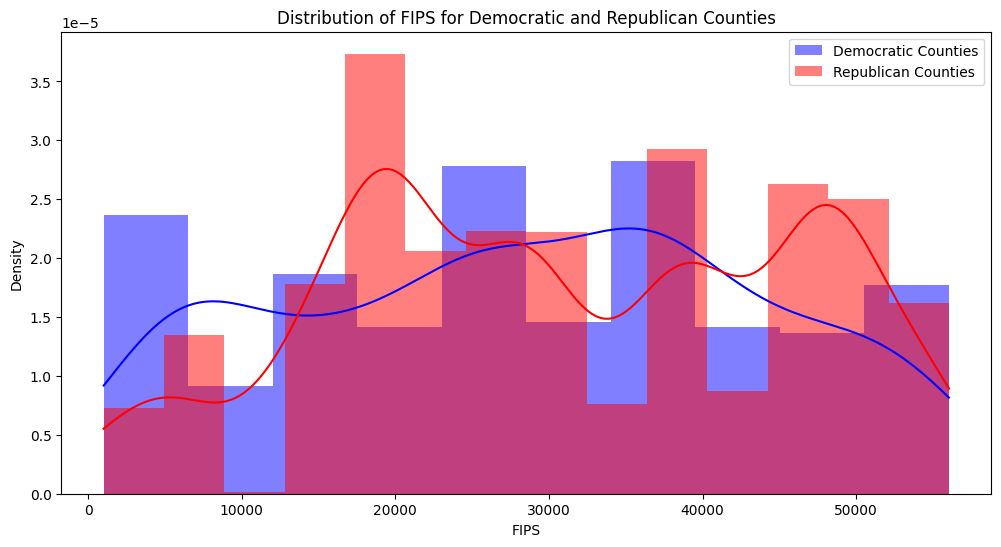

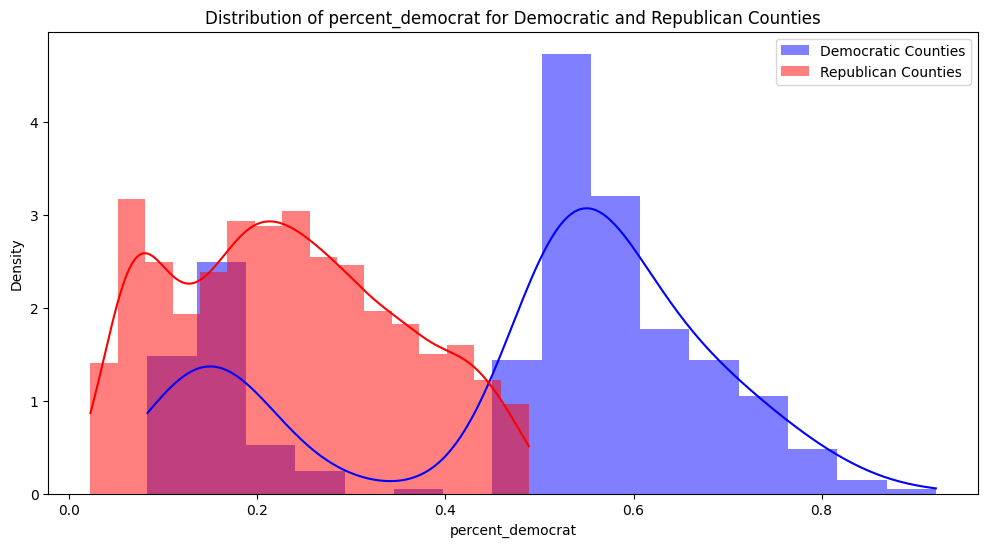

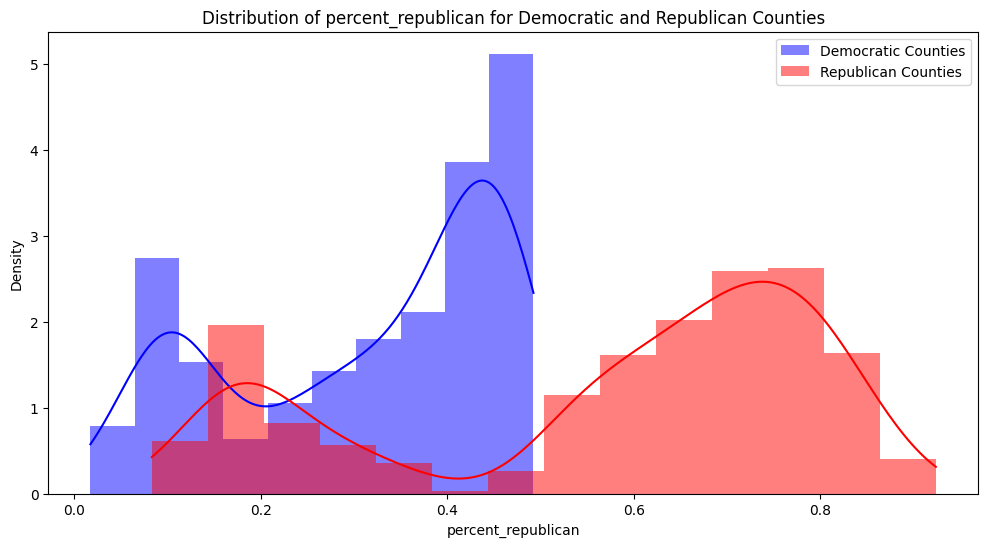

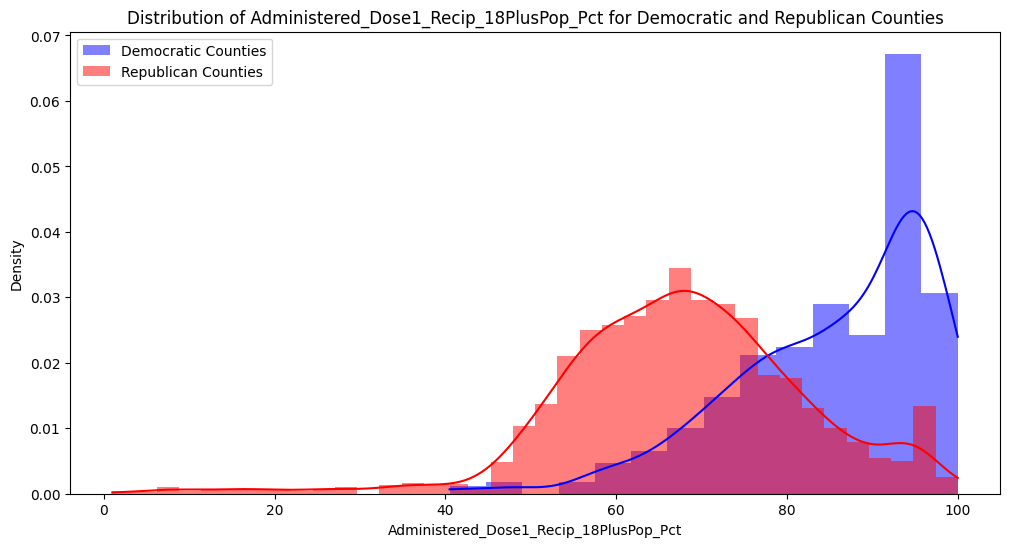

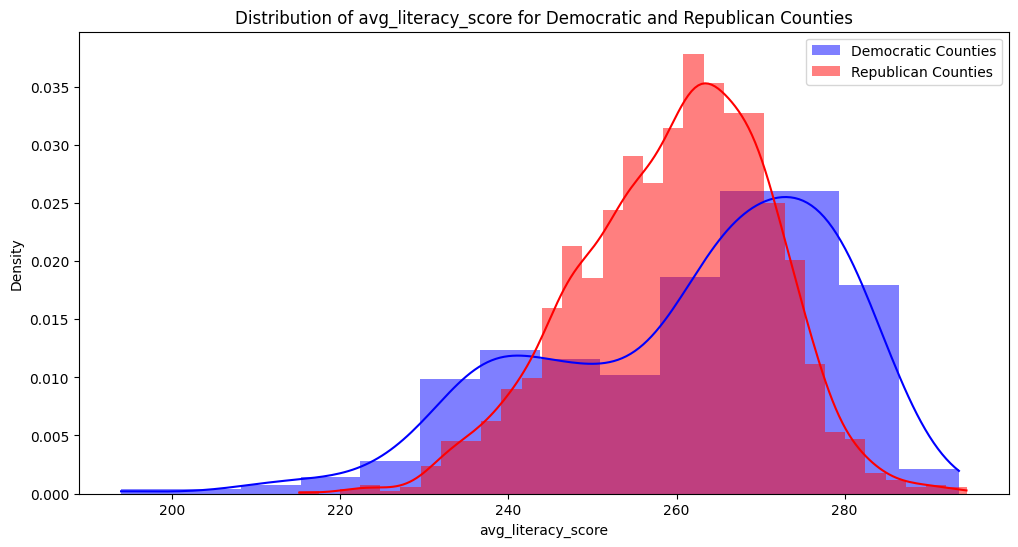

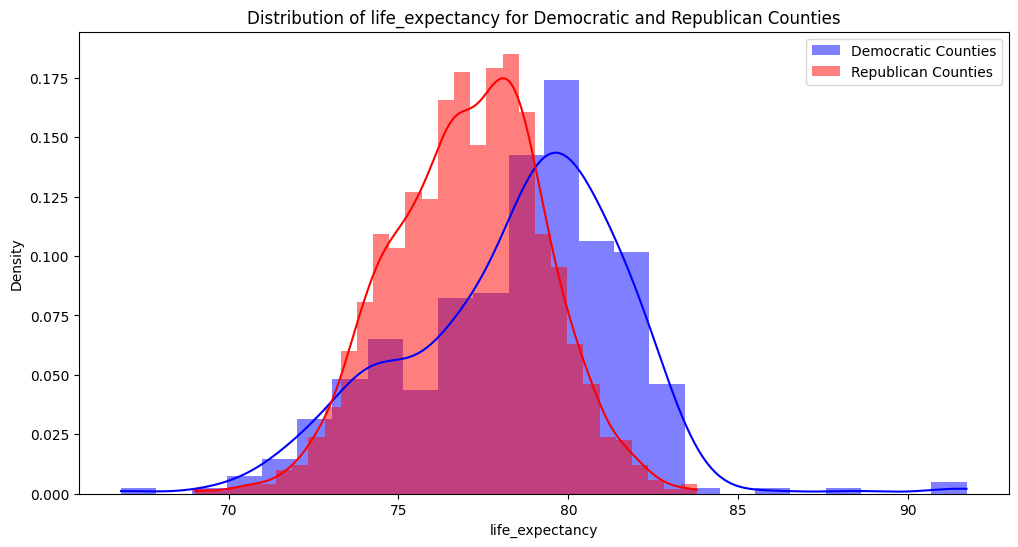

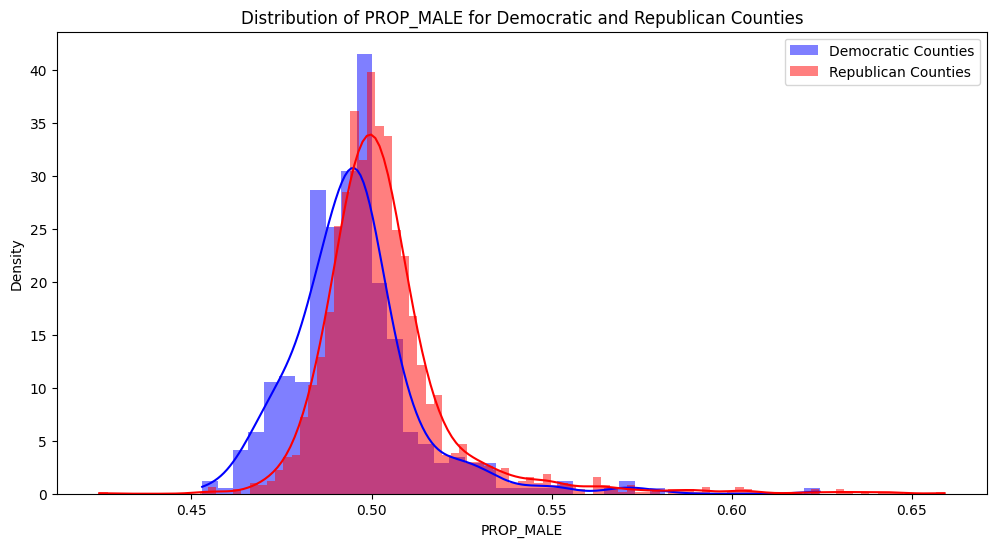

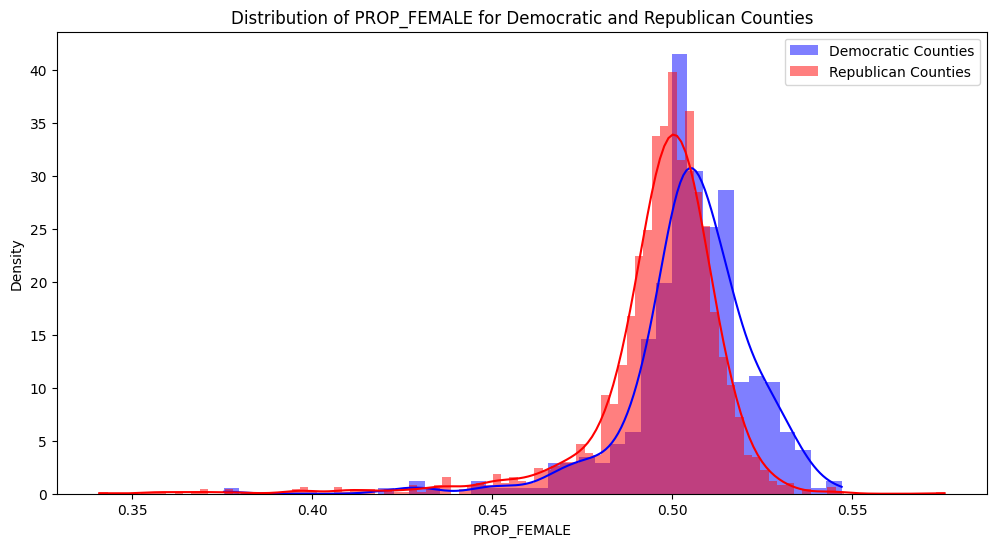

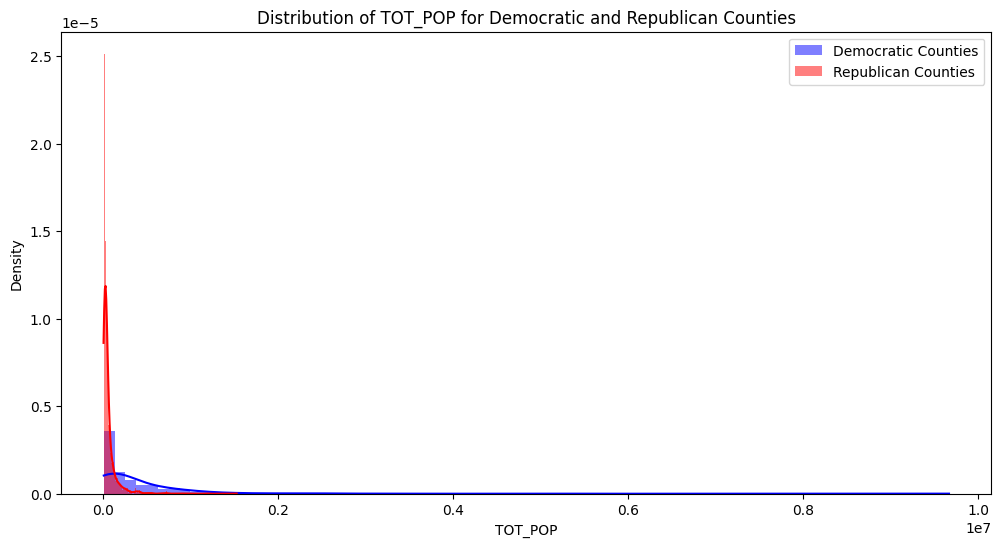

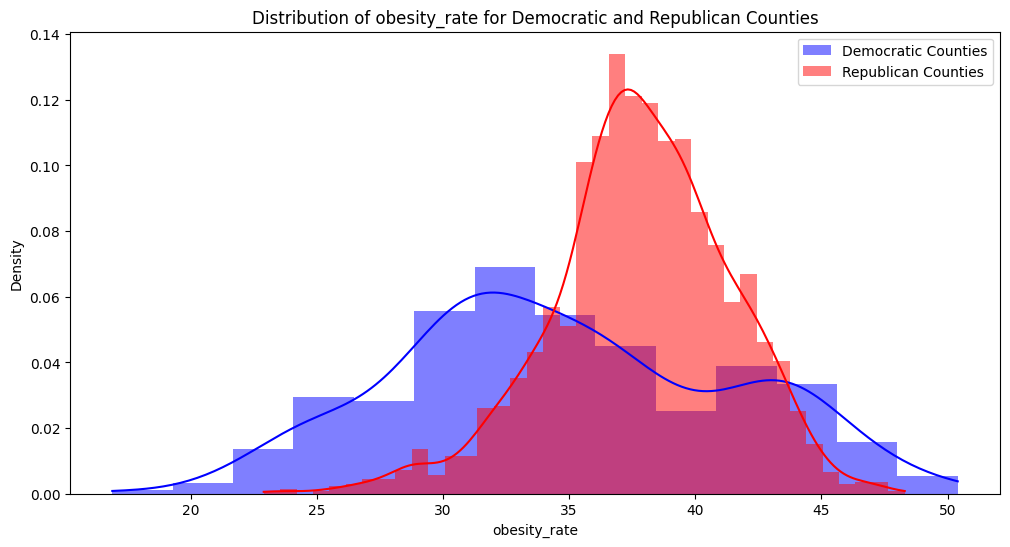

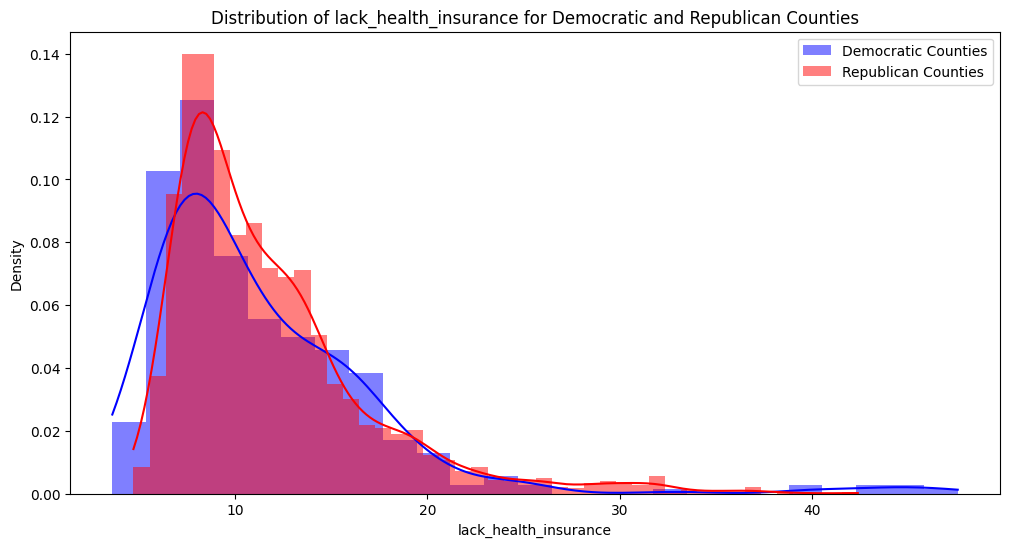

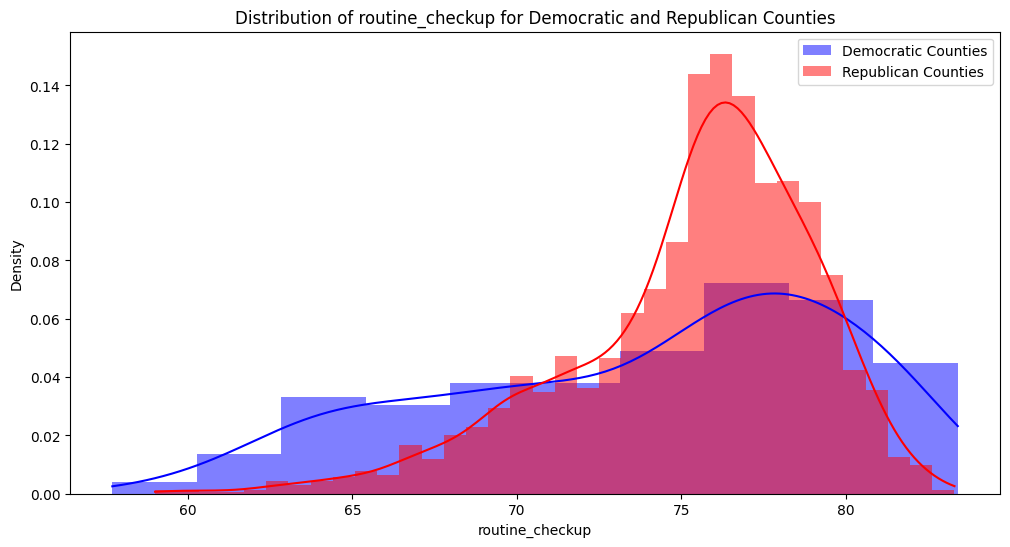

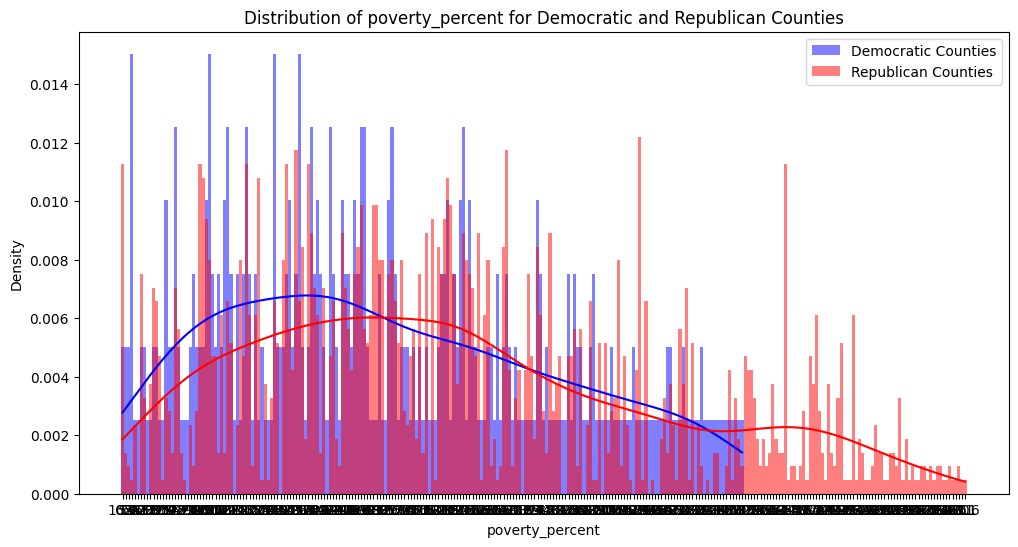

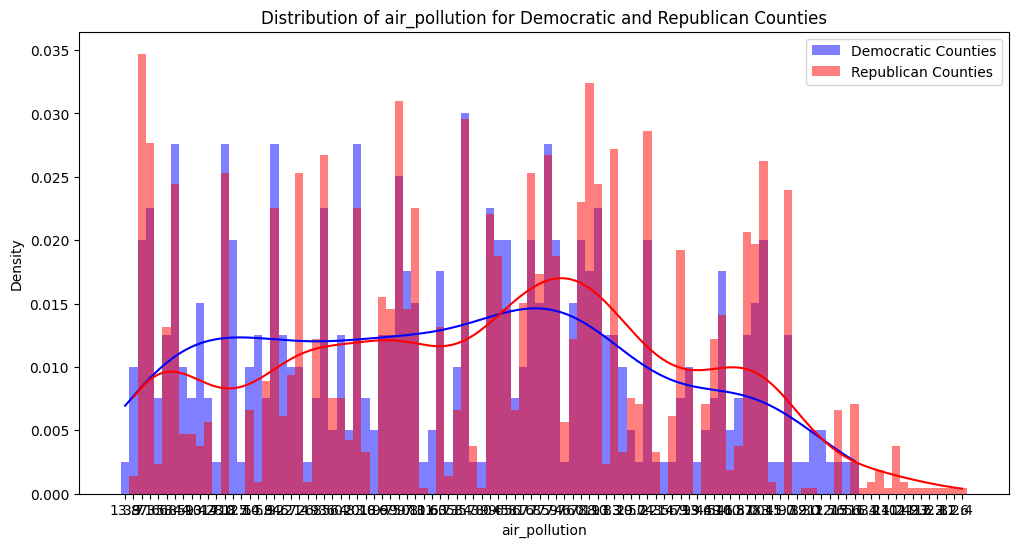

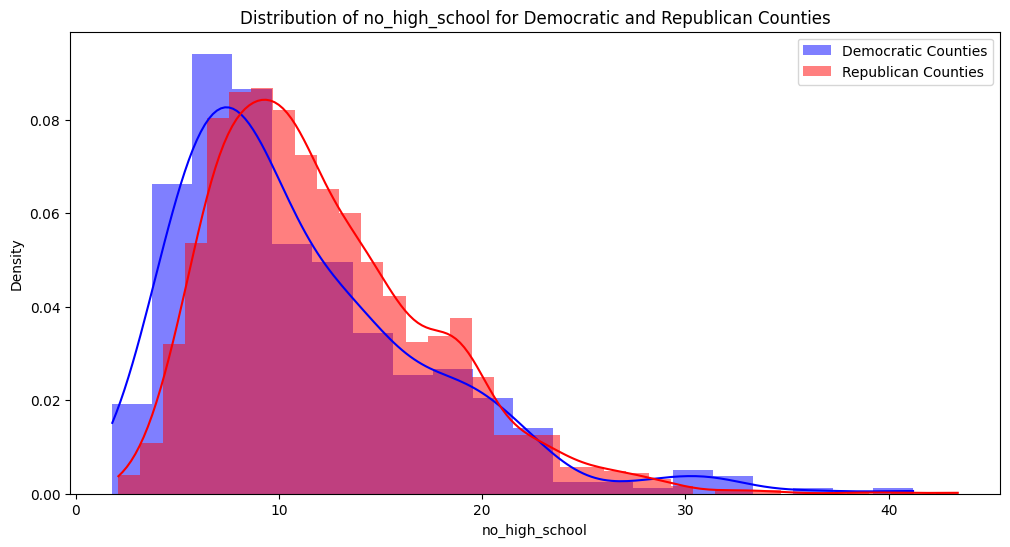

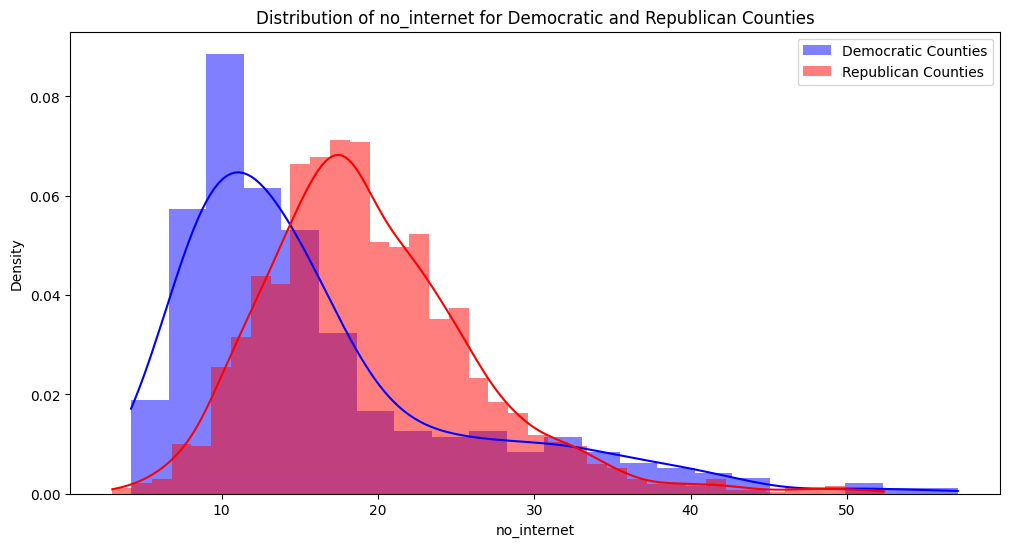

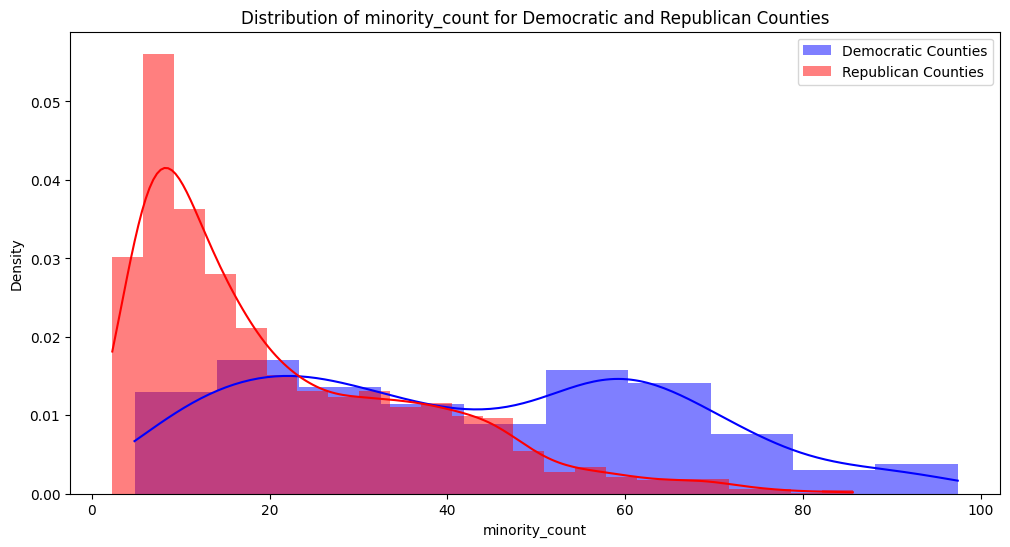

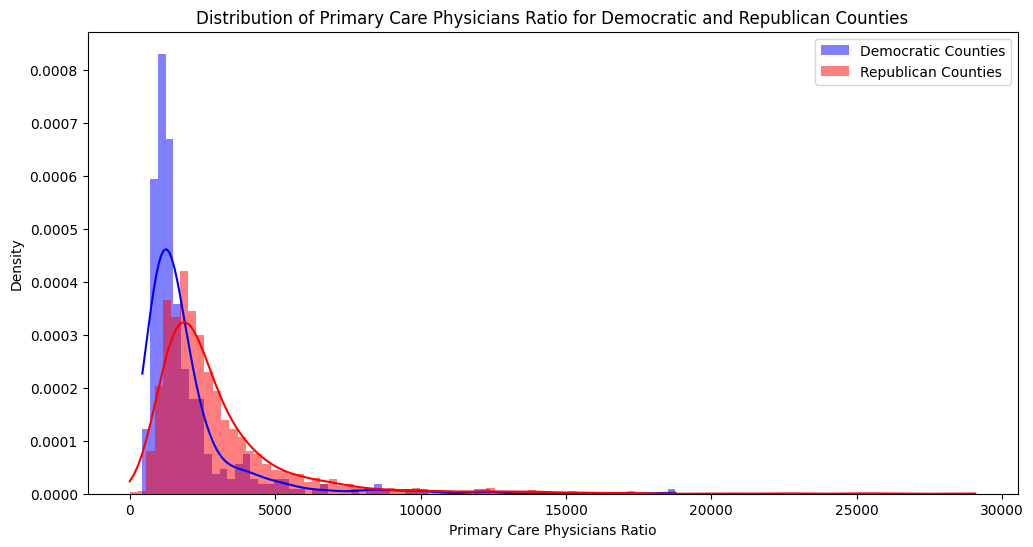

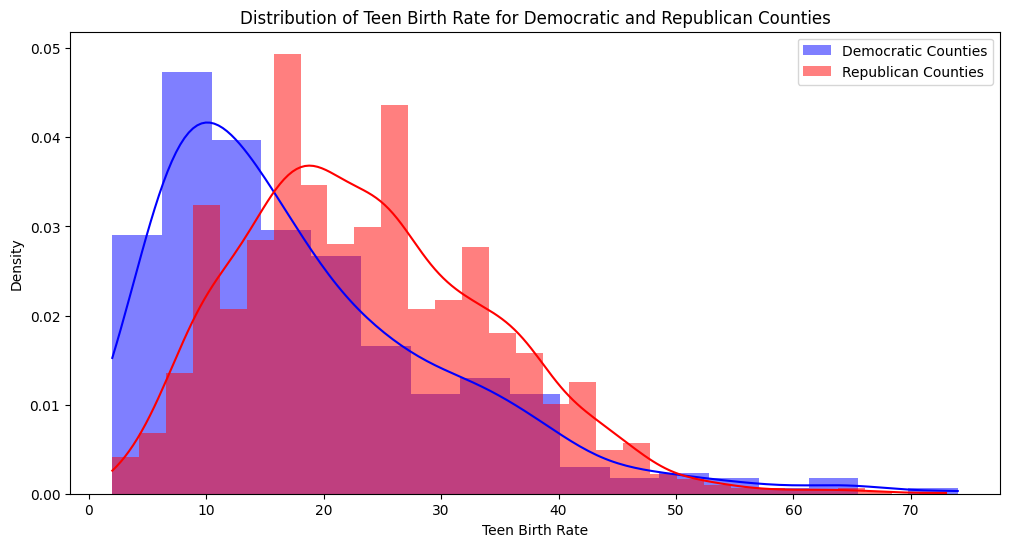

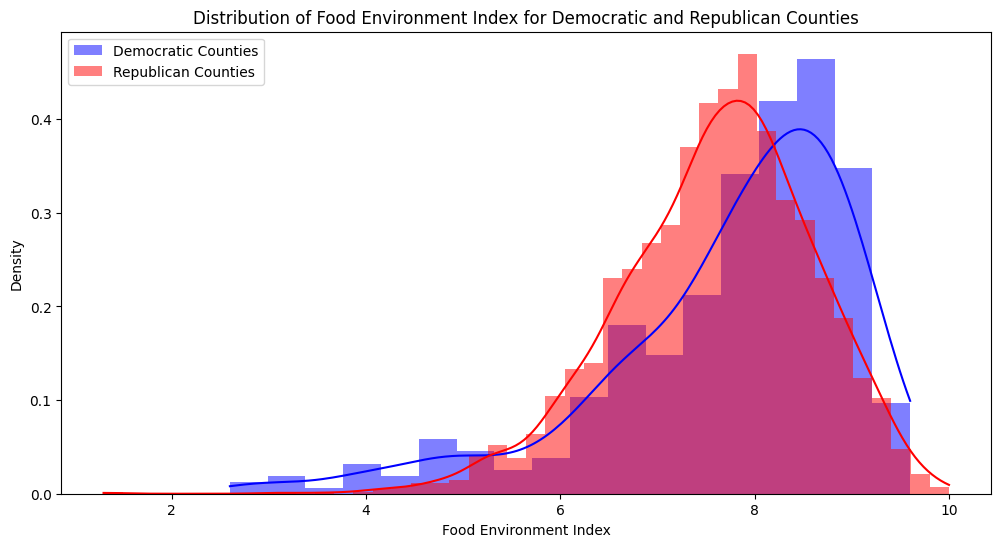

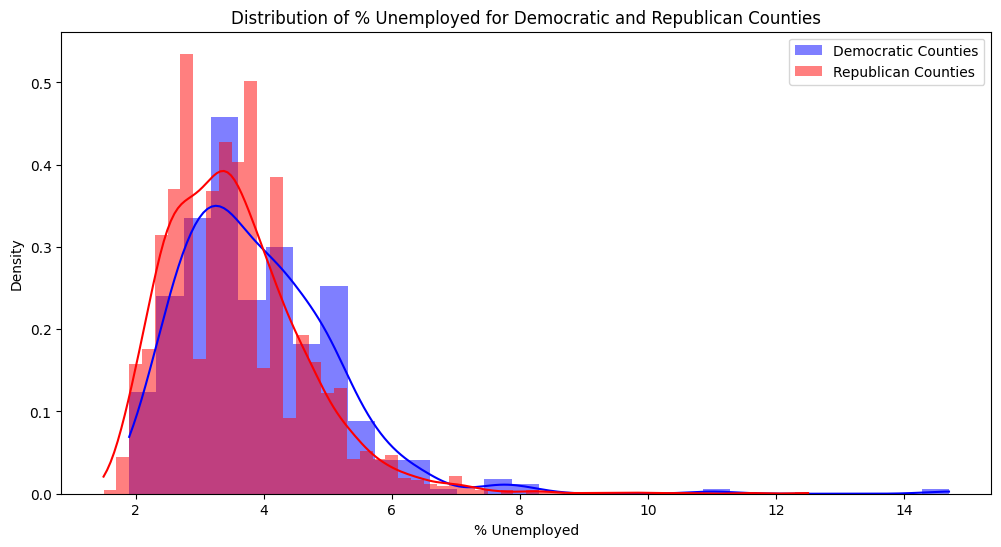

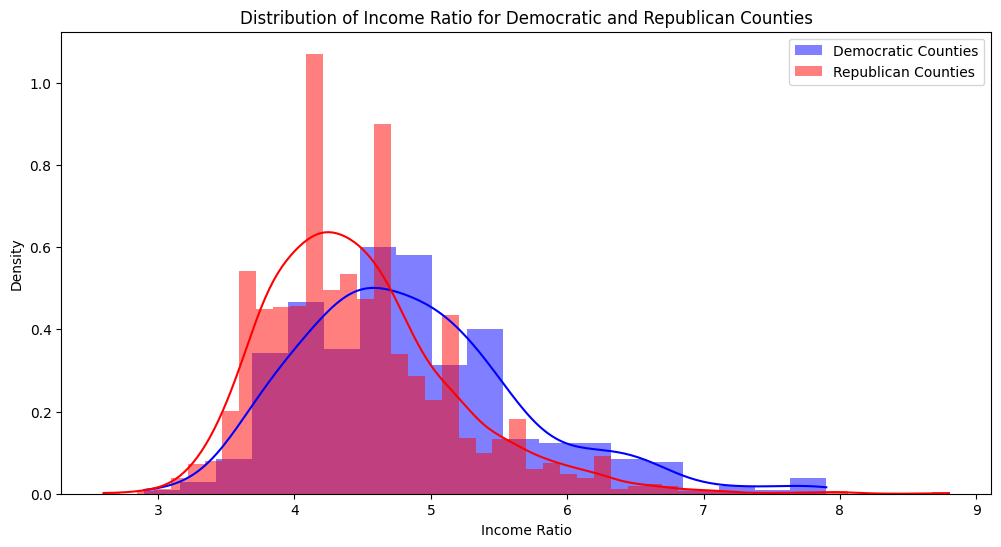

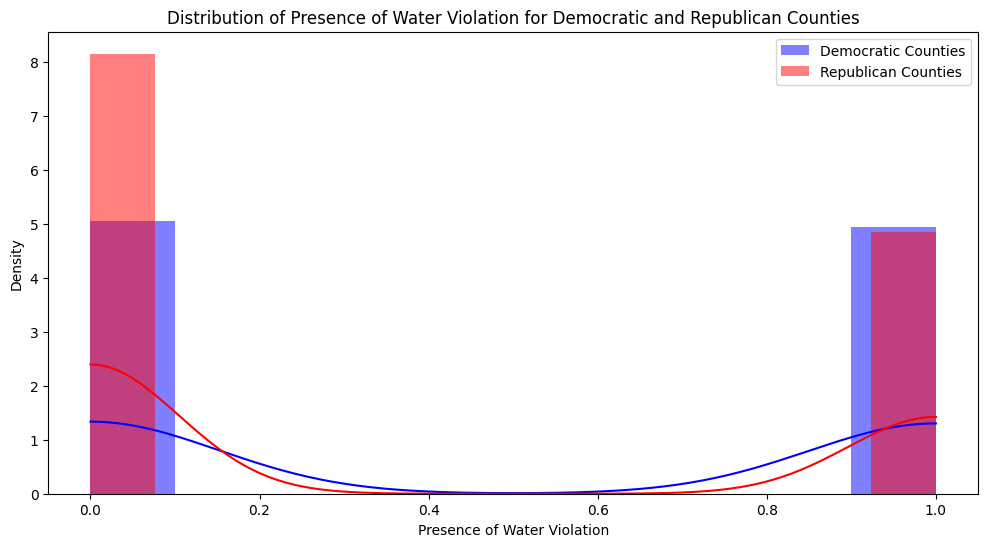

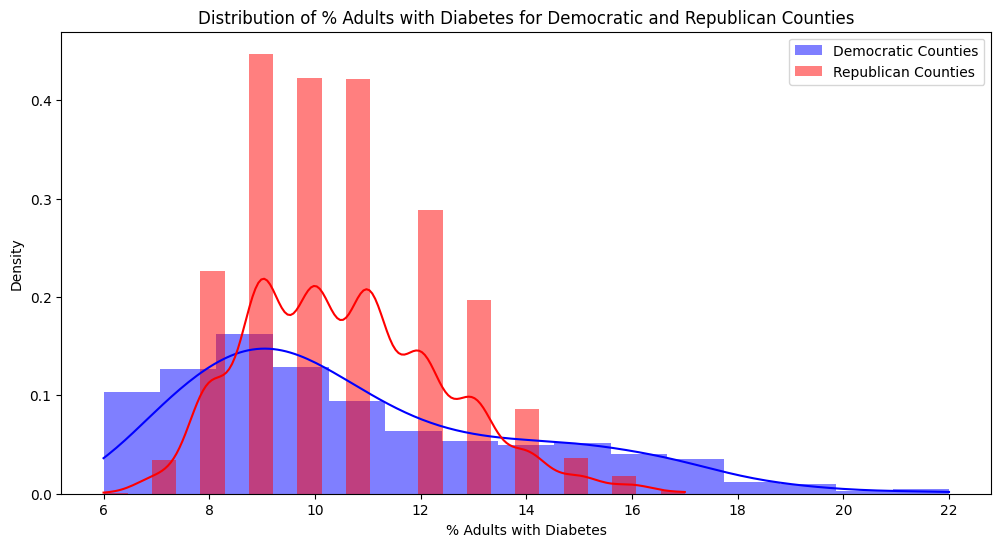

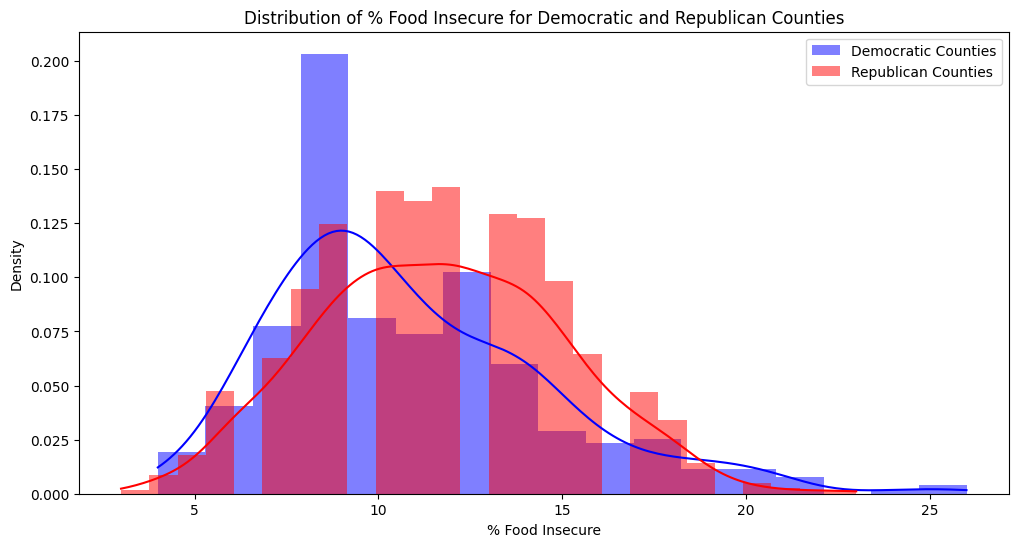

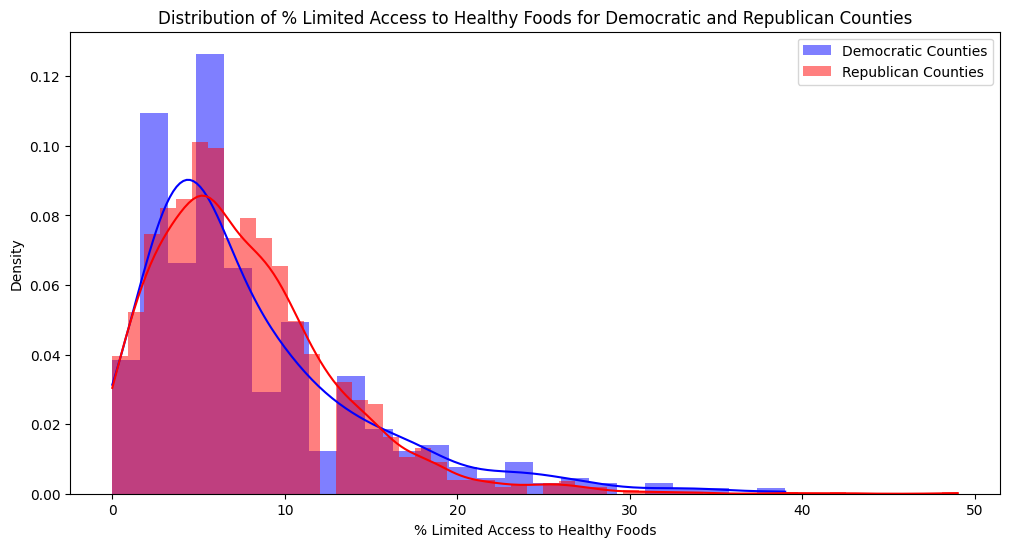

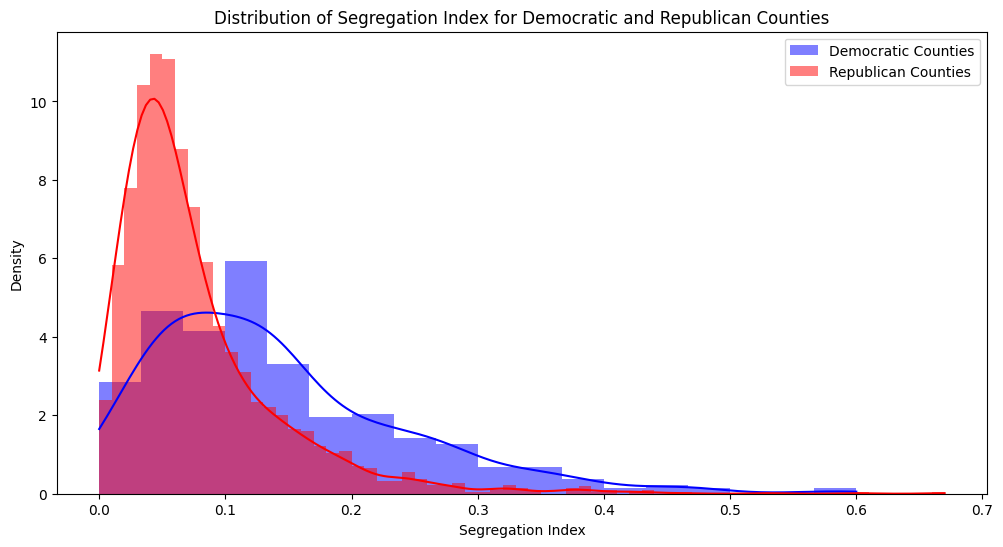

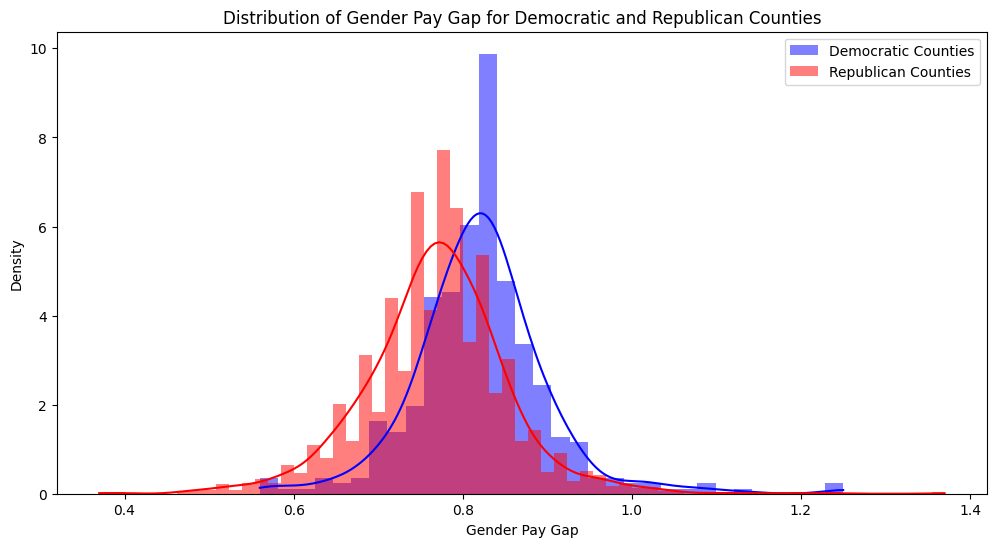

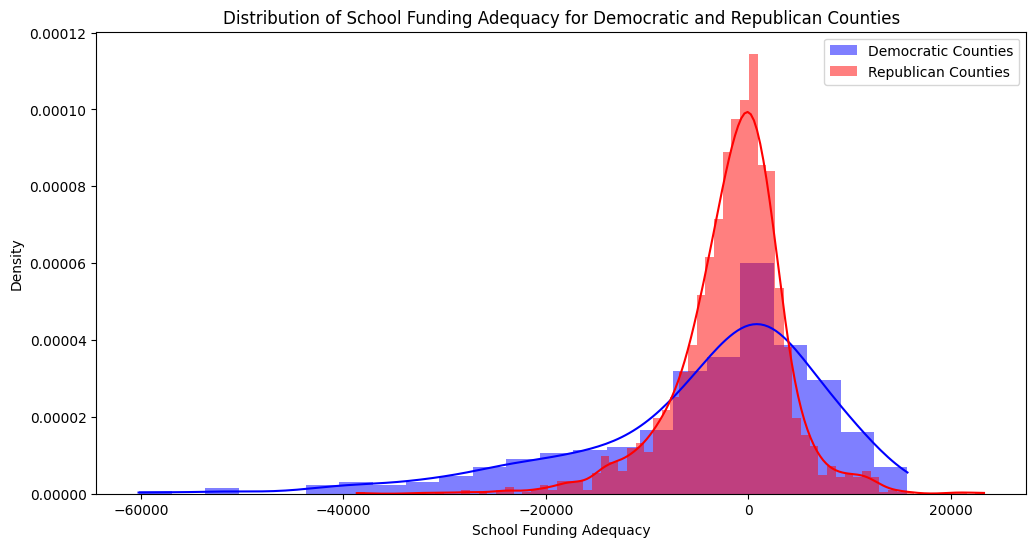

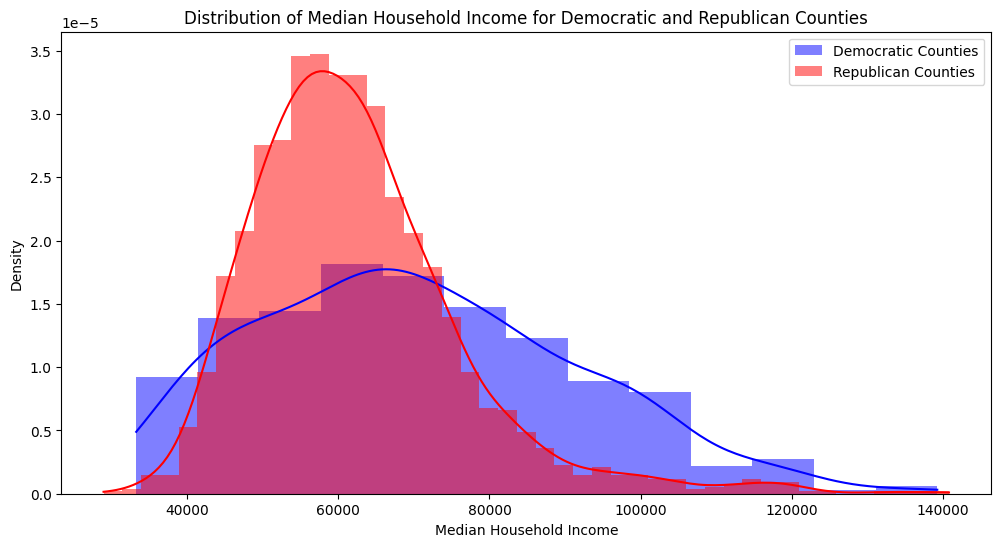

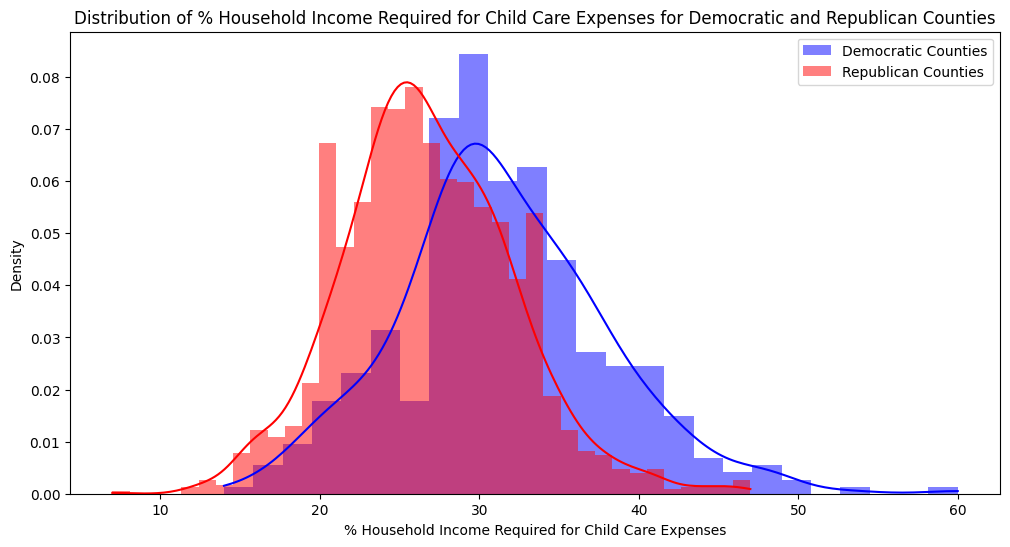

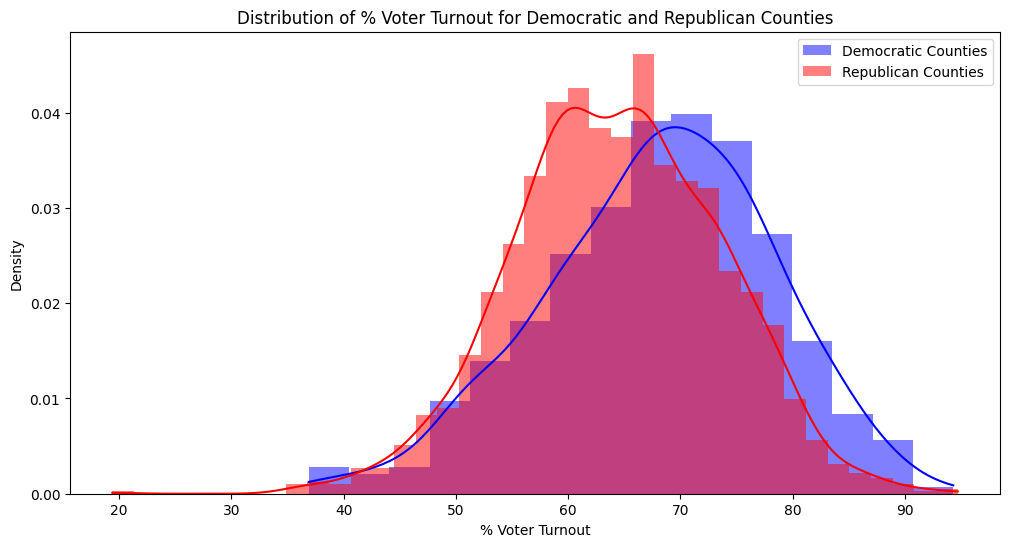

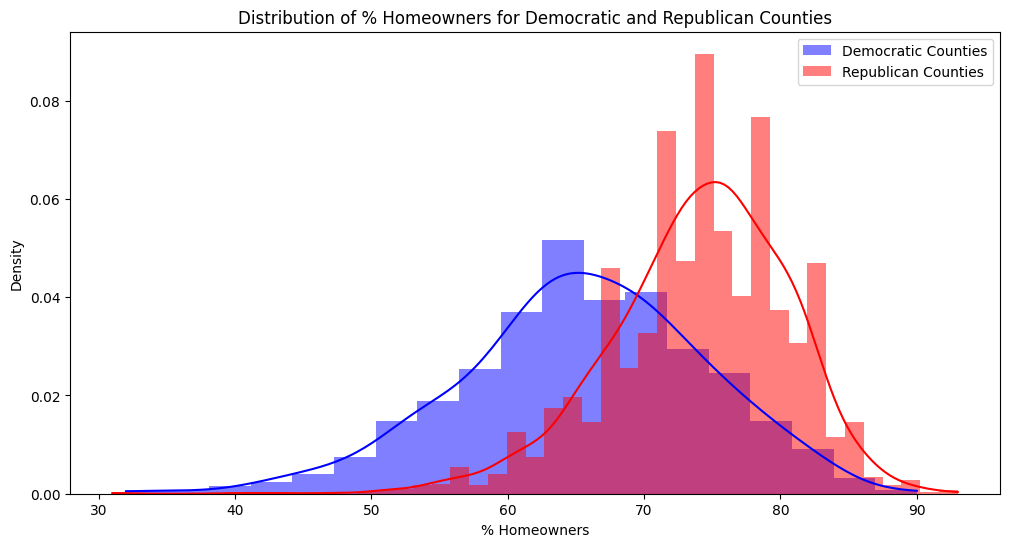

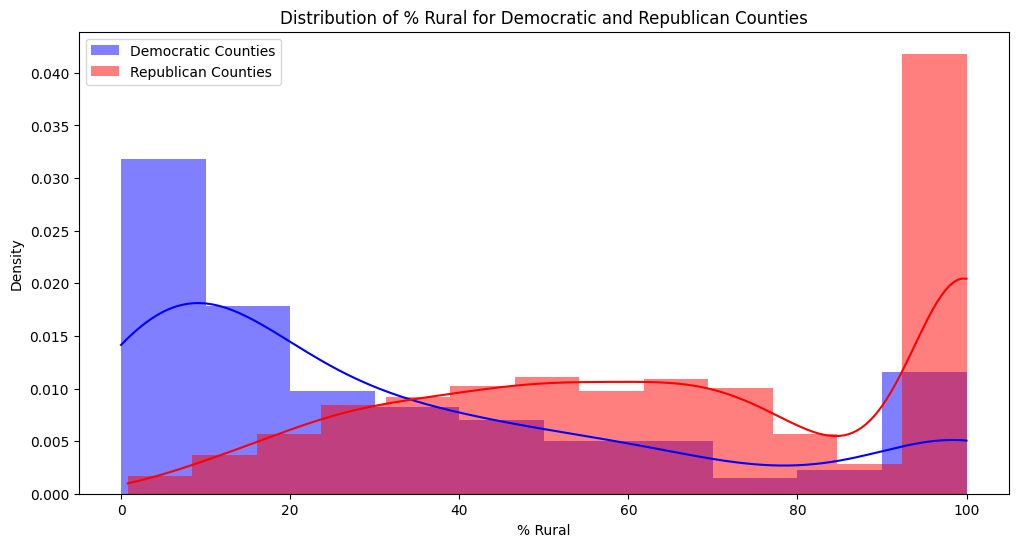

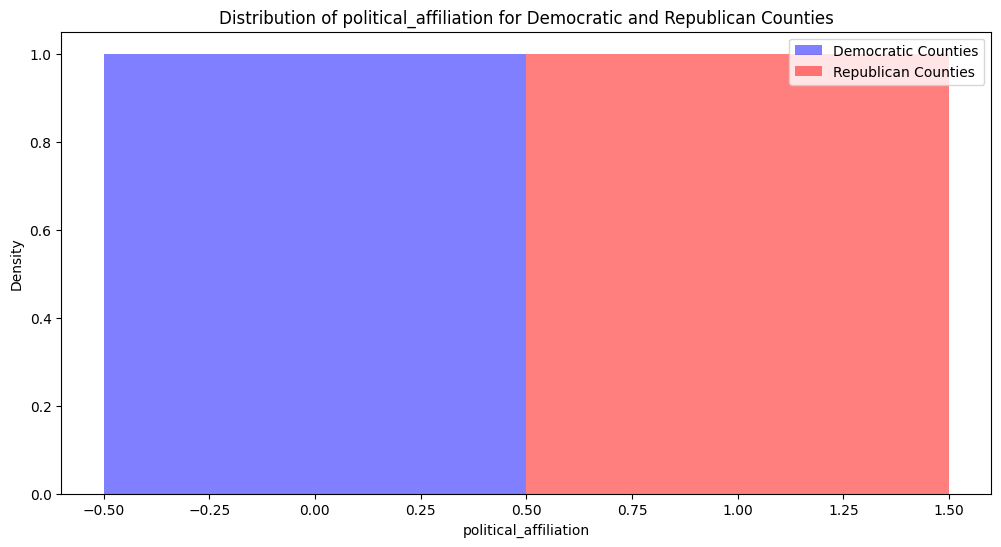

In [156]:
# Iterate over all columns in merged_df and plot their distributions
print(len(merged_df.columns))
for column in merged_df.columns:
    plot_col_distr(column)